In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.ticker as tkr
import pickle
import time
import constants
import os
import heapq
import datetime
import warnings
from colour import Color
from datetime import timedelta
from scipy.optimize import minimize
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.neighbors import NearestNeighbors,KDTree
from scipy.special import digamma
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import recall_score,f1_score, classification_report, r2_score
from functools import reduce
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

plt.style.use({'figure.figsize':(28,14)})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12
sns.set_theme(style="whitegrid")
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'pdf.fonttype': 42})


seed = constants.RAMDOM_SEED

In [2]:
fixed_occupancy_o_cc_pkl = open('orderly_fixed_training_col6_cc_test1.pkl', 'rb')
fixed_occupancy_o_cc = pickle.load(fixed_occupancy_o_cc_pkl)
fixed_occupancy_o_cc_pkl.close()
fixed_occupancy_o_mi_pkl = open('orderly_fixed_training_col6_classif_mi_test1.pkl', 'rb')
fixed_occupancy_o_mi = pickle.load(fixed_occupancy_o_mi_pkl)
fixed_occupancy_o_mi_pkl.close()

fixed_sensor_o_cc_pkl = open('orderly_fixed_training_col7_cc_test1.pkl', 'rb')
fixed_sensor_o_cc = pickle.load(fixed_sensor_o_cc_pkl)
fixed_sensor_o_cc_pkl.close()
fixed_sensor_o_mi_pkl = open('orderly_fixed_training_col7_classif_mi_test1.pkl', 'rb')
fixed_sensor_o_mi = pickle.load(fixed_sensor_o_mi_pkl)
fixed_sensor_o_mi_pkl.close()

fixed_mineral_o_cc_pkl = open('orderly_fixed_training_col11_cc_test1.pkl', 'rb')
fixed_mineral_o_cc = pickle.load(fixed_mineral_o_cc_pkl)
fixed_mineral_o_cc_pkl.close()
fixed_mineral_o_mi_pkl = open('orderly_fixed_training_col11_mi_test1.pkl', 'rb')
fixed_mineral_o_mi = pickle.load(fixed_mineral_o_mi_pkl)
fixed_mineral_o_mi_pkl.close()

fixed_air_o_cc_pkl = open('orderly_fixed_training_col9_cc_test1.pkl', 'rb')
fixed_air_o_cc = pickle.load(fixed_air_o_cc_pkl)
fixed_air_o_cc_pkl.close()
fixed_air_o_mi_pkl = open('orderly_fixed_training_col9_mi_test1.pkl', 'rb')
fixed_air_o_mi = pickle.load(fixed_air_o_mi_pkl)
fixed_air_o_mi_pkl.close()

fixed_power_o_cc_pkl = open('orderly_fixed_training_col25_cc_test2.pkl', 'rb')
fixed_power_o_cc = pickle.load(fixed_power_o_cc_pkl)
fixed_power_o_cc_pkl.close()
fixed_power_o_mi_pkl = open('orderly_fixed_training_col25_classif_mi_test2.pkl', 'rb')
fixed_power_o_mi = pickle.load(fixed_power_o_mi_pkl)
fixed_power_o_mi_pkl.close()

In [3]:
stochastic_occupancy_o_cc_pkl = open('orderly_fixed_training_col6_cc_test1.pkl', 'rb')
stochastic_occupancy_o_cc = pickle.load(stochastic_occupancy_o_cc_pkl)
stochastic_occupancy_o_cc_pkl.close()
stochastic_occupancy_o_mi_pkl = open('orderly_fixed_training_col6_classif_mi_test1.pkl', 'rb')
stochastic_occupancy_o_mi = pickle.load(stochastic_occupancy_o_mi_pkl)
stochastic_occupancy_o_mi_pkl.close()

stochastic_sensor_o_cc_pkl = open('orderly_fixed_training_col7_cc_test1.pkl', 'rb')
stochastic_sensor_o_cc = pickle.load(stochastic_sensor_o_cc_pkl)
stochastic_sensor_o_cc_pkl.close()
stochastic_sensor_o_mi_pkl = open('orderly_fixed_training_col7_classif_mi_test1.pkl', 'rb')
stochastic_sensor_o_mi = pickle.load(stochastic_sensor_o_mi_pkl)
stochastic_sensor_o_mi_pkl.close()

stochastic_air_o_cc_pkl = open('orderly_fixed_training_col9_cc_test1.pkl', 'rb')
stochastic_air_o_cc = pickle.load(stochastic_air_o_cc_pkl)
stochastic_air_o_cc_pkl.close()
stochastic_air_o_mi_pkl = open('orderly_fixed_training_col9_mi_test1.pkl', 'rb')
stochastic_air_o_mi = pickle.load(stochastic_air_o_mi_pkl)
stochastic_air_o_mi_pkl.close()

stochastic_power_o_cc_pkl = open('orderly_fixed_training_col25_cc_test2.pkl', 'rb')
stochastic_power_o_cc = pickle.load(stochastic_power_o_cc_pkl)
stochastic_power_o_cc_pkl.close()
stochastic_power_o_mi_pkl = open('orderly_fixed_training_col25_classif_mi_test2.pkl', 'rb')
stochastic_power_o_mi = pickle.load(stochastic_power_o_mi_pkl)
stochastic_power_o_mi_pkl.close()

In [4]:
fixed_occupancy_orderly_pkl = open('occupancy_orderly_fixed_result_test1.pkl', 'rb')
fixed_occupancy_orderly = pickle.load(fixed_occupancy_orderly_pkl)
fixed_occupancy_orderly_pkl.close()
fixed_air_orderly_pkl = open('air_quality_orderly_fixed_result_test1.pkl', 'rb')
fixed_air_orderly = pickle.load(fixed_air_orderly_pkl)
fixed_air_orderly_pkl.close()
fixed_sensor_orderly_pkl = open('pump_sensor_orderly_fixed_result_test1.pkl', 'rb')
fixed_sensor_orderly = pickle.load(fixed_sensor_orderly_pkl)
fixed_sensor_orderly_pkl.close()
fixed_power_demand_orderly_pkl = open('power_demand_orderly_fixed_result_test2.pkl', 'rb')
fixed_power_demand_orderly = pickle.load(fixed_power_demand_orderly_pkl)
fixed_power_demand_orderly_pkl.close()
fixed_mineral_processing_orderly_pkl = open('mineral_processing_orderly_fixed_result_test1.pkl', 'rb')
fixed_mineral_processing_orderly = pickle.load(fixed_mineral_processing_orderly_pkl)
fixed_mineral_processing_orderly_pkl.close()

fixed_occupancy_tft_orderly_pkl = open('occupancy_orderly_fixed_tft_result_test1.pkl', 'rb')
fixed_occupancy_tft_orderly = pickle.load(fixed_occupancy_tft_orderly_pkl)
fixed_occupancy_tft_orderly_pkl.close()
fixed_air_tft_orderly_pkl = open('air_quality_orderly_fixed_tft_result_test1.pkl', 'rb')
fixed_air_tft_orderly = pickle.load(fixed_air_tft_orderly_pkl)
fixed_air_tft_orderly_pkl.close()
fixed_sensor_tft_orderly_pkl = open('pump_sensor_orderly_fixed_tft_result_test1.pkl', 'rb')
fixed_sensor_tft_orderly = pickle.load(fixed_sensor_tft_orderly_pkl)
fixed_sensor_tft_orderly_pkl.close()
fixed_power_demand_tft_orderly_pkl = open('power_demand_orderly_fixed_tft_result_test2.pkl', 'rb')
fixed_power_demand_tft_orderly = pickle.load(fixed_power_demand_tft_orderly_pkl)
fixed_power_demand_tft_orderly_pkl.close()
fixed_mineral_processing_tft_orderly_pkl = open('mineral_processing_orderly_fixed_tft_result_test1.pkl', 'rb')
fixed_mineral_processing_tft_orderly = pickle.load(fixed_mineral_processing_tft_orderly_pkl)
fixed_mineral_processing_tft_orderly_pkl.close()

In [5]:
stochastic_occupancy_orderly_pkl = open('occupancy_orderly_stochastic_result_test1.pkl', 'rb')
stochastic_occupancy_orderly = pickle.load(stochastic_occupancy_orderly_pkl)
stochastic_occupancy_orderly_pkl.close()
stochastic_air_orderly_pkl = open('air_quality_orderly_stochastic_result_test1.pkl', 'rb')
stochastic_air_orderly = pickle.load(stochastic_air_orderly_pkl)
stochastic_air_orderly_pkl.close()
stochastic_sensor_orderly_pkl = open('pump_sensor_orderly_stochastic_result_test1.pkl', 'rb')
stochastic_sensor_orderly = pickle.load(stochastic_sensor_orderly_pkl)
stochastic_sensor_orderly_pkl.close()
stochastic_power_demand_orderly_pkl = open('power_demand_orderly_stochastic_result_test2.pkl', 'rb')
stochastic_power_demand_orderly = pickle.load(stochastic_power_demand_orderly_pkl)
stochastic_power_demand_orderly_pkl.close()

stochastic_occupancy_tft_orderly_pkl = open('occupancy_orderly_stochastic_tft_result_test1.pkl', 'rb')
stochastic_occupancy_tft_orderly = pickle.load(stochastic_occupancy_tft_orderly_pkl)
stochastic_occupancy_tft_orderly_pkl.close()
stochastic_air_tft_orderly_pkl = open('air_quality_orderly_stochastic_tft_result_test1.pkl', 'rb')
stochastic_air_tft_orderly = pickle.load(stochastic_air_tft_orderly_pkl)
stochastic_air_tft_orderly_pkl.close()
stochastic_sensor_tft_orderly_pkl = open('pump_sensor_orderly_stochastic_tft_result_test1.pkl', 'rb')
stochastic_sensor_tft_orderly = pickle.load(stochastic_sensor_tft_orderly_pkl)
stochastic_sensor_tft_orderly_pkl.close()
stochastic_power_demand_tft_orderly_pkl = open('power_demand_orderly_stochastic_tft_result_test2.pkl', 'rb')
stochastic_power_demand_tft_orderly = pickle.load(stochastic_power_demand_tft_orderly_pkl)
stochastic_power_demand_tft_orderly_pkl.close()

In [6]:
tsmb_top = pd.read_csv('tsmb_top.csv')
perturbed_top = pd.read_csv('perturbed_top.csv')
tdb_top = pd.read_csv('tdb_top.csv')
tsmb_select_b = pd.read_csv('tsmb_select_b.csv')
perturbed_select_b = pd.read_csv('perturbed_select_b.csv')
tdb_select_b = pd.read_csv('tdb_select_b.csv')
confidence_tsmb = pd.read_csv('confidence_tsmb.csv')
all_performance = pd.read_csv('all_performance.csv')
performance = pd.read_csv('performance.csv')
tft_performance = pd.read_csv('tft_performance.csv')
tft_select_b = pd.read_csv('tft_select_b.csv')

In [7]:
fixed_o_real = fixed_occupancy_orderly['orderly_test_result_dict']['orderly_real_time_delay_indicator']
fixed_s_real = fixed_sensor_orderly['orderly_test_result_dict']['orderly_real_time_delay_indicator']
fixed_a_real = fixed_air_orderly['orderly_test_result_dict']['orderly_real_time_delay_indicator']
fixed_p_real = fixed_power_demand_orderly['orderly_test_result_dict']['orderly_real_time_delay_indicator']

fixed_tft_o_real = fixed_occupancy_tft_orderly['orderly_real_time_delay_indicator']
fixed_tft_s_real = fixed_sensor_tft_orderly['orderly_real_time_delay_indicator']
fixed_tft_a_real = fixed_air_tft_orderly['orderly_real_time_delay_indicator']
fixed_tft_p_real = fixed_power_demand_tft_orderly['orderly_real_time_delay_indicator']

stochastic_o_real = stochastic_occupancy_orderly['orderly_test_result_dict']['orderly_real_time_delay_indicator']
stochastic_s_real = stochastic_sensor_orderly['orderly_test_result_dict']['orderly_real_time_delay_indicator']
stochastic_a_real = stochastic_air_orderly['orderly_test_result_dict']['orderly_real_time_delay_indicator']
stochastic_p_real = stochastic_power_demand_orderly['orderly_test_result_dict']['orderly_real_time_delay_indicator']

stochastic_tft_o_real = stochastic_occupancy_tft_orderly['orderly_real_time_delay_indicator']
stochastic_tft_s_real = stochastic_sensor_tft_orderly['orderly_real_time_delay_indicator']
stochastic_tft_a_real = stochastic_air_tft_orderly['orderly_real_time_delay_indicator']
stochastic_tft_p_real = stochastic_power_demand_tft_orderly['orderly_real_time_delay_indicator']

fixed_o_no_aligment = fixed_occupancy_orderly['orderly_test_result_dict']['orderly_no_alignment_indicator']
fixed_s_no_aligment = fixed_sensor_orderly['orderly_test_result_dict']['orderly_no_alignment_indicator']
fixed_a_no_aligment = fixed_air_orderly['orderly_test_result_dict']['orderly_no_alignment_indicator']
fixed_p_no_aligment = fixed_power_demand_orderly['orderly_test_result_dict']['orderly_no_alignment_indicator']
fixed_m_no_aligment = fixed_mineral_processing_orderly['orderly_test_result_dict']['orderly_no_alignment_indicator']

fixed_tft_o_no_aligment = fixed_occupancy_tft_orderly['orderly_tft_no_alignment_indicator']
fixed_tft_s_no_aligment = fixed_sensor_tft_orderly['orderly_tft_no_alignment_indicator']
fixed_tft_a_no_aligment = fixed_air_tft_orderly['orderly_tft_no_alignment_indicator']
fixed_tft_p_no_aligment = fixed_power_demand_tft_orderly['orderly_tft_no_alignment_indicator']
fixed_tft_m_no_aligment = fixed_mineral_processing_tft_orderly['orderly_tft_no_alignment_indicator']

stochastic_o_no_aligment = stochastic_occupancy_orderly['orderly_test_result_dict']['orderly_no_alignment_indicator']
stochastic_s_no_aligment = stochastic_sensor_orderly['orderly_test_result_dict']['orderly_no_alignment_indicator']
stochastic_a_no_aligment = stochastic_air_orderly['orderly_test_result_dict']['orderly_no_alignment_indicator']
stochastic_p_no_aligment = stochastic_power_demand_orderly['orderly_test_result_dict']['orderly_no_alignment_indicator']

stochastic_tft_o_no_aligment = stochastic_occupancy_tft_orderly['orderly_tft_no_alignment_indicator']
stochastic_tft_s_no_aligment = stochastic_sensor_tft_orderly['orderly_tft_no_alignment_indicator']
stochastic_tft_a_no_aligment = stochastic_air_tft_orderly['orderly_tft_no_alignment_indicator']
stochastic_tft_p_no_aligment = stochastic_power_demand_tft_orderly['orderly_tft_no_alignment_indicator']

In [8]:
fixed_dis_air_quality = pd.read_csv('air_quality_fixed_dis_tsmb.csv')
fixed_dis_occupancy = pd.read_csv('occupancy_fixed_dis_tsmb.csv')
fixed_dis_sensor = pd.read_csv('pump_sensor_fixed_dis_tsmb.csv')
fixed_dis_mineral = pd.read_csv('mineral_processing_fixed_dis_tsmb.csv')
fixed_dis_power_demand = pd.read_csv('power_demand_fixed_dis_tsmb.csv')

In [9]:
stochastic_dis_air = pd.read_csv('air_quality_stochastic_dis_tsmb.csv')
stochastic_dis_occupancy = pd.read_csv('occupancy_stochastic_dis_tsmb.csv')
stochastic_dis_sensor = pd.read_csv('pump_sensor_stochastic_dis_tsmb.csv')
stochastic_dis_power_demand = pd.read_csv('power_demand_stochastic_dis_tsmb.csv')

## Plot

### palette

In [10]:
color_lst = sns.color_palette("tab10")
blue_lst = list(Color(rgb=color_lst[0]).range_to(Color(rgb=sns.color_palette("Blues_r", 10)[6]), 6))
orange_lst = list(Color(rgb=color_lst[1]).range_to(Color(rgb=sns.color_palette("Oranges_r", 10)[6]), 6))
blue_colors = [i.hex for i in blue_lst]
orange_colors = [i.hex for i in orange_lst]

custom_palette = {'TSMB-TDMI': color_lst[0], 'TSMB-GCC': color_lst[1], 'TDMI': color_lst[2], 'GCC': color_lst[3], 
                  'Perturbed Model-TDMI': color_lst[0], 'Perturbed Model-GCC': orange_colors[1], 
                  'TDB-TDMI': color_lst[0], 'TDB-GCC': color_lst[1], 
                  'TSMB-TDMI 95%': blue_colors[1], 'TSMB-TDMI 90%': blue_colors[3], 'TSMB-TDMI 80%': blue_colors[4],
                  'TSMB-GCC 95%': orange_colors[1], 'TSMB-GCC 90%': orange_colors[3], 'TSMB-GCC 80%': orange_colors[4], 
                  'TSMB-TDMI top100': blue_colors[0], 'TSMB-TDMI top50': blue_colors[1], 
                  'TSMB-TDMI top20': blue_colors[2], 'TSMB-TDMI top10': blue_colors[3], 
                  'TSMB-TDMI top5': blue_colors[4], 'TSMB-TDMI top1': blue_colors[5], 
                  'TSMB-GCC top100': orange_colors[0], 'TSMB-GCC top50': orange_colors[1], 
                  'TSMB-GCC top20': orange_colors[2], 'TSMB-GCC top10': orange_colors[3], 
                  'TSMB-GCC top5': orange_colors[4], 'TSMB-GCC top1': orange_colors[5], 
                  'Perturbed Model-TDMI top100': blue_colors[0], 'Perturbed Model-TDMI top50': blue_colors[1], 
                  'Perturbed Model-TDMI top20': blue_colors[2], 'Perturbed Model-TDMI top10': blue_colors[3], 
                  'Perturbed Model-TDMI top5': blue_colors[4], 'Perturbed Model-TDMI top1': blue_colors[5], 
                  'Perturbed Model-GCC top100': orange_colors[0], 'Perturbed Model-GCC top50': orange_colors[1], 
                  'Perturbed Model-GCC top20': orange_colors[2], 'Perturbed Model-GCC top10': orange_colors[3], 
                  'Perturbed Model-GCC top5': orange_colors[4], 'Perturbed Model-GCC top1': orange_colors[5], 
                  'TDB-TDMI top100': blue_colors[0], 'TDB-TDMI top50': blue_colors[1], 'TDB-TDMI top20': blue_colors[2], 
                  'TDB-TDMI top10': blue_colors[3], 'TDB-TDMI top5': blue_colors[4], 'TDB-TDMI top1': blue_colors[5], 
                  'TDB-GCC top100': orange_colors[0], 'TDB-GCC top50': orange_colors[1], 'TDB-GCC top20': orange_colors[2], 
                  'TDB-GCC top10': orange_colors[3], 'TDB-GCC top5': orange_colors[4], 'TDB-GCC top1': orange_colors[5], 
                  'TSMB-TDMI B100': blue_colors[0], 'TSMB-TDMI B50': blue_colors[1], 
                  'TSMB-TDMI B20': blue_colors[2], 'TSMB-TDMI B10': blue_colors[3], 
                  'TSMB-TDMI B5': blue_colors[4], 'TSMB-TDMI B1': blue_colors[5], 
                  'TSMB-GCC B100': orange_colors[0], 'TSMB-GCC B50': orange_colors[1], 
                  'TSMB-GCC B20': orange_colors[2], 'TSMB-GCC B10': orange_colors[3], 
                  'TSMB-GCC B5': orange_colors[4], 'TSMB-GCC B1': orange_colors[5], 
                  'Perturbed Model-TDMI B100': blue_colors[0], 'Perturbed Model-TDMI B50': blue_colors[1], 
                  'Perturbed Model-TDMI B20': blue_colors[2], 'Perturbed Model-TDMI B10': blue_colors[3], 
                  'Perturbed Model-TDMI B5': blue_colors[4], 'Perturbed Model-TDMI B1': blue_colors[5], 
                  'Perturbed Model-GCC B100': orange_colors[0], 'Perturbed Model-GCC B50': orange_colors[1], 
                  'Perturbed Model-GCC B20': orange_colors[2], 'Perturbed Model-GCC B10': orange_colors[3], 
                  'Perturbed Model-GCC B5': orange_colors[4], 'Perturbed Model-GCC B1': orange_colors[5], 
                  'TDB-TDMI B100': blue_colors[0], 'TDB-TDMI B50': blue_colors[1], 'TDB-TDMI B20': blue_colors[2], 
                  'TDB-TDMI B10': blue_colors[3], 'TDB-TDMI B5': blue_colors[4], 'TDB-TDMI B1': blue_colors[5], 
                  'TDB-GCC B100': orange_colors[0], 'TDB-GCC B50': orange_colors[1], 'TDB-GCC B20': orange_colors[2], 
                  'TDB-GCC B10': orange_colors[3], 'TDB-GCC B5': orange_colors[4], 'TDB-GCC B1': orange_colors[5], 
                  'GCC Time Delay': color_lst[3], 'TDMI Time Delay': color_lst[2], 'Real Time Delay': "#808080"}

col_order = ["Occupancy Fixed", "Water Pump Fixed", "Power Demand Fixed", "Air Quality Fixed", "Mineral Processing", 
             "Occupancy Stoch.", "Water Pump Stoch.", "Power Demand Stoch.", "Air Quality Stoch."]

### performance

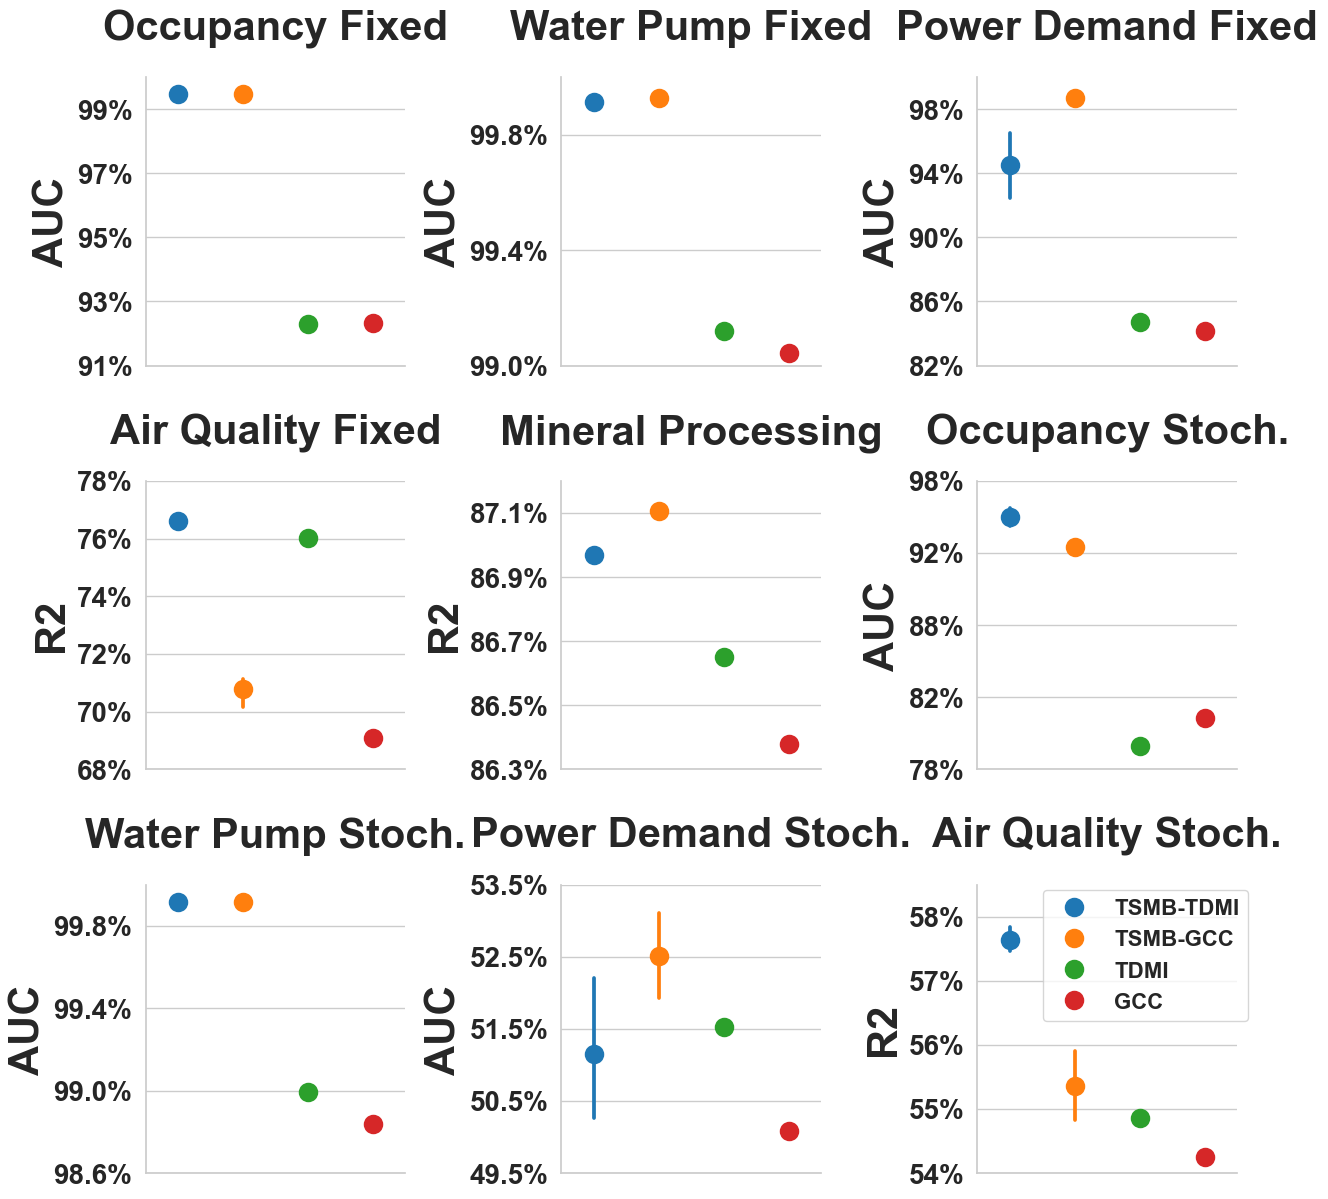

In [11]:
performance['Dataset'] = performance['Dataset'].replace('Stochastic', 'Stoch.', regex=True)

g = sns.FacetGrid(performance, col="Dataset", height=4, sharey=False, col_wrap=3, margin_titles=True, col_order=col_order)
g.map_dataframe(sns.pointplot, x='Method',  y="test_values", hue='Method', linestyles='', palette=custom_palette, markersize=12)
g.set_xticklabels([], rotation=30, horizontalalignment='right', fontsize=20)
g.set_yticklabels(fontsize=20)
g.set_titles(col_template="{col_name}", size=30, loc='center', y=1.1, fontweight='bold')
g.set_xlabels('')
plt.subplots_adjust(wspace=0.6, hspace=0.4)

for ax in g.axes.flat:
    # ax.title.set_position([.5, 50.1])
    for point in ax.collections:
        point.set_sizes([80]) 

for i, ax in enumerate(g.axes.flat):
    if i in [1, 4, 6, 7]:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.1f}%'))
    else:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.0f}%'))
        
for i, ax in enumerate(g.axes.flat):
    if i in [0, 1, 2, 5, 6, 7]:
        ax.set_ylabel("AUC", fontsize = 30)
        ax.set_yticks(ax.get_yticks()[::2])
    else:
        ax.set_ylabel("R2", fontsize = 30)
        ax.set_yticks(ax.get_yticks()[::2])

plt.legend([g.axes[0].get_children()[0], g.axes[0].get_children()[5], g.axes[0].get_children()[10], g.axes[0].get_children()[15]], 
           ['TSMB-TDMI', 'TSMB-GCC', 'TDMI', 'GCC'], bbox_to_anchor=(0.21, 1.02),ncol=1.1, fontsize=16)

In [12]:
g.savefig("gbdt_performance.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


### all_performance_plot

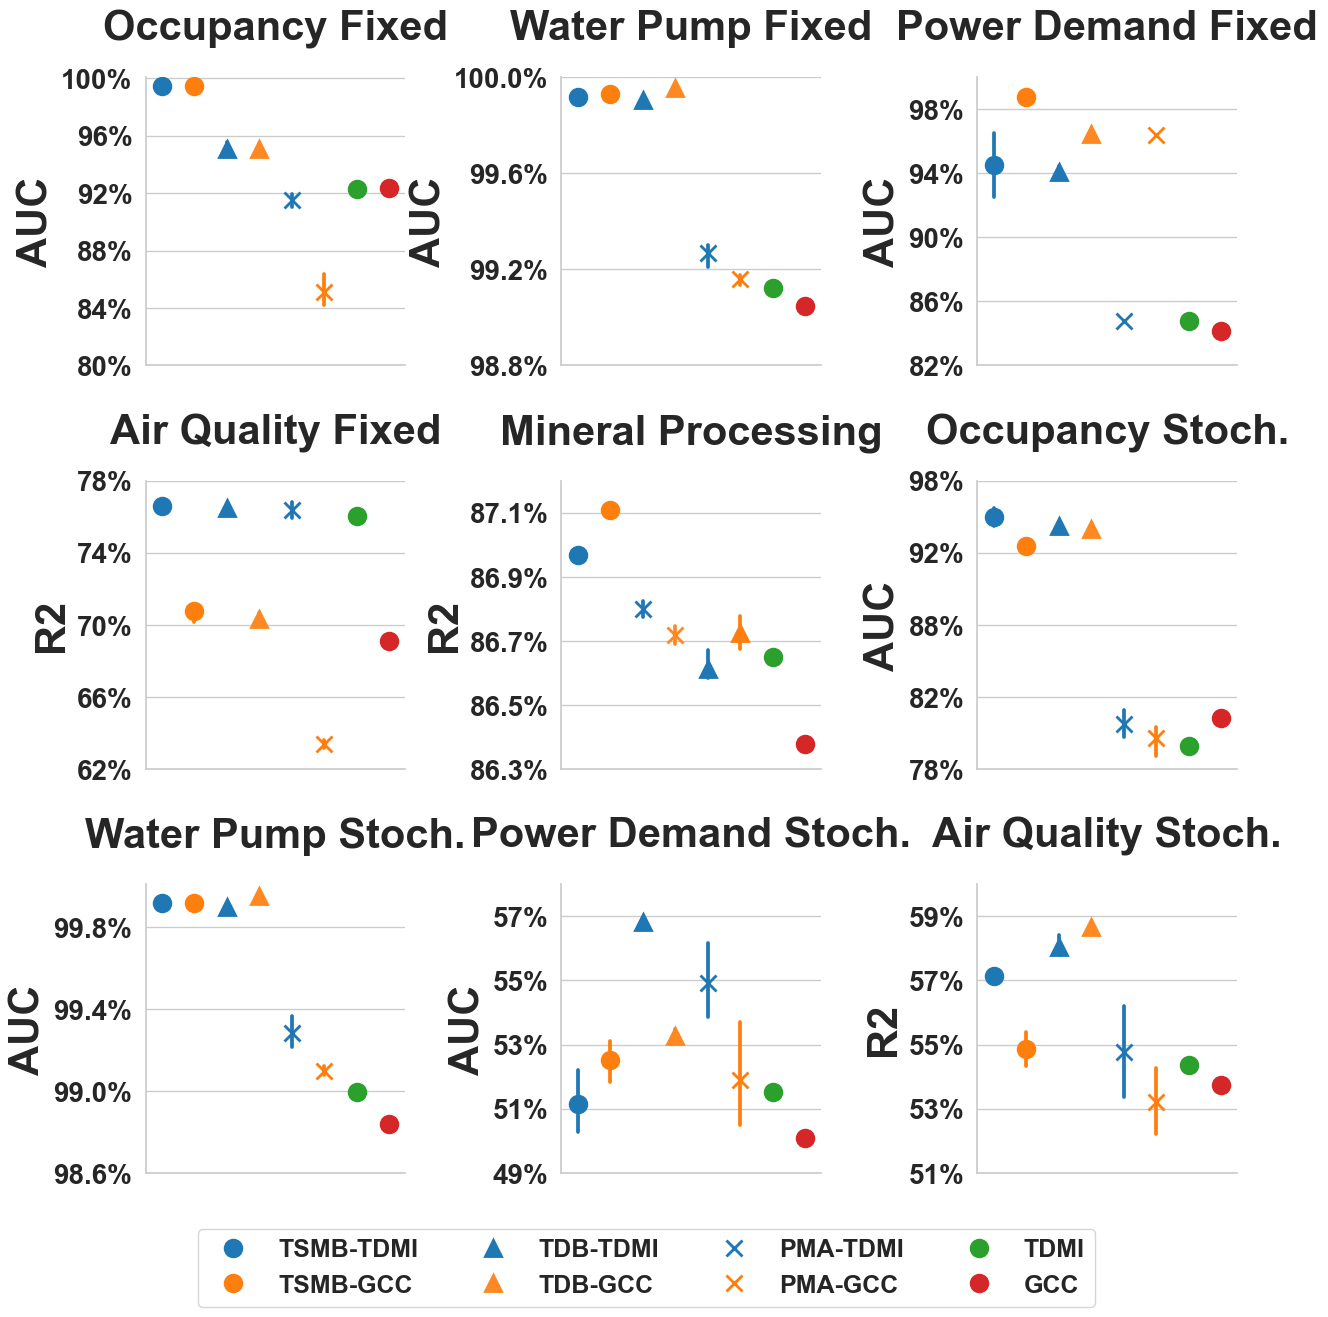

In [13]:
all_performance['Dataset'] = all_performance['Dataset'].replace('Stochastic', 'Stoch.', regex=True)

g = sns.FacetGrid(all_performance, col="Dataset", height=4, sharey=False, col_wrap=3, margin_titles=False, col_order=col_order)
g.map_dataframe(sns.pointplot, x='Method',  y="test_values", hue='Method', linestyles='', palette=custom_palette, 
                markers=['o', 'o', '^', '^', 'x', 'x', 'o', 'o'], markersize=12)
g.set_xticklabels([], rotation=30, horizontalalignment='right', fontsize=18)
g.set_yticklabels(fontsize=20)
plt.subplots_adjust(wspace=0.6, hspace=0.4)
for ax in g.axes.flat:
    for point in ax.collections:
        point.set_sizes([80])
        
for i, ax in enumerate(g.axes.flat):
    if i == 0:
        ax.set_ylim(0.8, 1.001)
        ax.set_yticks([0.8, 0.84, 0.88, 0.92, 0.96, 1])
    elif i == 6:
        ax.set_ylim(0.986, 1.0001)
        ax.set_yticks([0.986, 0.988, 0.99, 0.992, 0.994, 0.996, 0.998, 1])
        ax.set_yticks(ax.get_yticks()[::2])
    else:
        ax.set_yticks(ax.get_yticks()[::2])

for i, ax in enumerate(g.axes.flat):
    if i in [1, 4, 6]:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.1f}%'))
    else:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.0f}%'))
        
for i, ax in enumerate(g.axes.flat):
    if i in [0, 1, 2, 5, 6, 7]:
        ax.set_ylabel("AUC", fontsize = 30)
    else:
        ax.set_ylabel("R2", fontsize = 30)

g.set_titles(col_template="{col_name}", size=30, fontweight='bold', y=1.1)
g.set_xlabels('')
plt.legend([g.axes[0].get_children()[0], g.axes[0].get_children()[9], g.axes[0].get_children()[18], g.axes[0].get_children()[27],
            g.axes[0].get_children()[36], g.axes[0].get_children()[45],g.axes[0].get_children()[54], g.axes[0].get_children()[63]], 
           ['TSMB-TDMI', 'TSMB-GCC', 'TDB-TDMI', 'TDB-GCC','PMA-TDMI', 'PMA-GCC', 'TDMI', 'GCC'], 
           bbox_to_anchor=(0.5, -0.15),ncol=4, fontsize=18)

In [14]:
g.savefig("gbdt_all_performance.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


### confidence

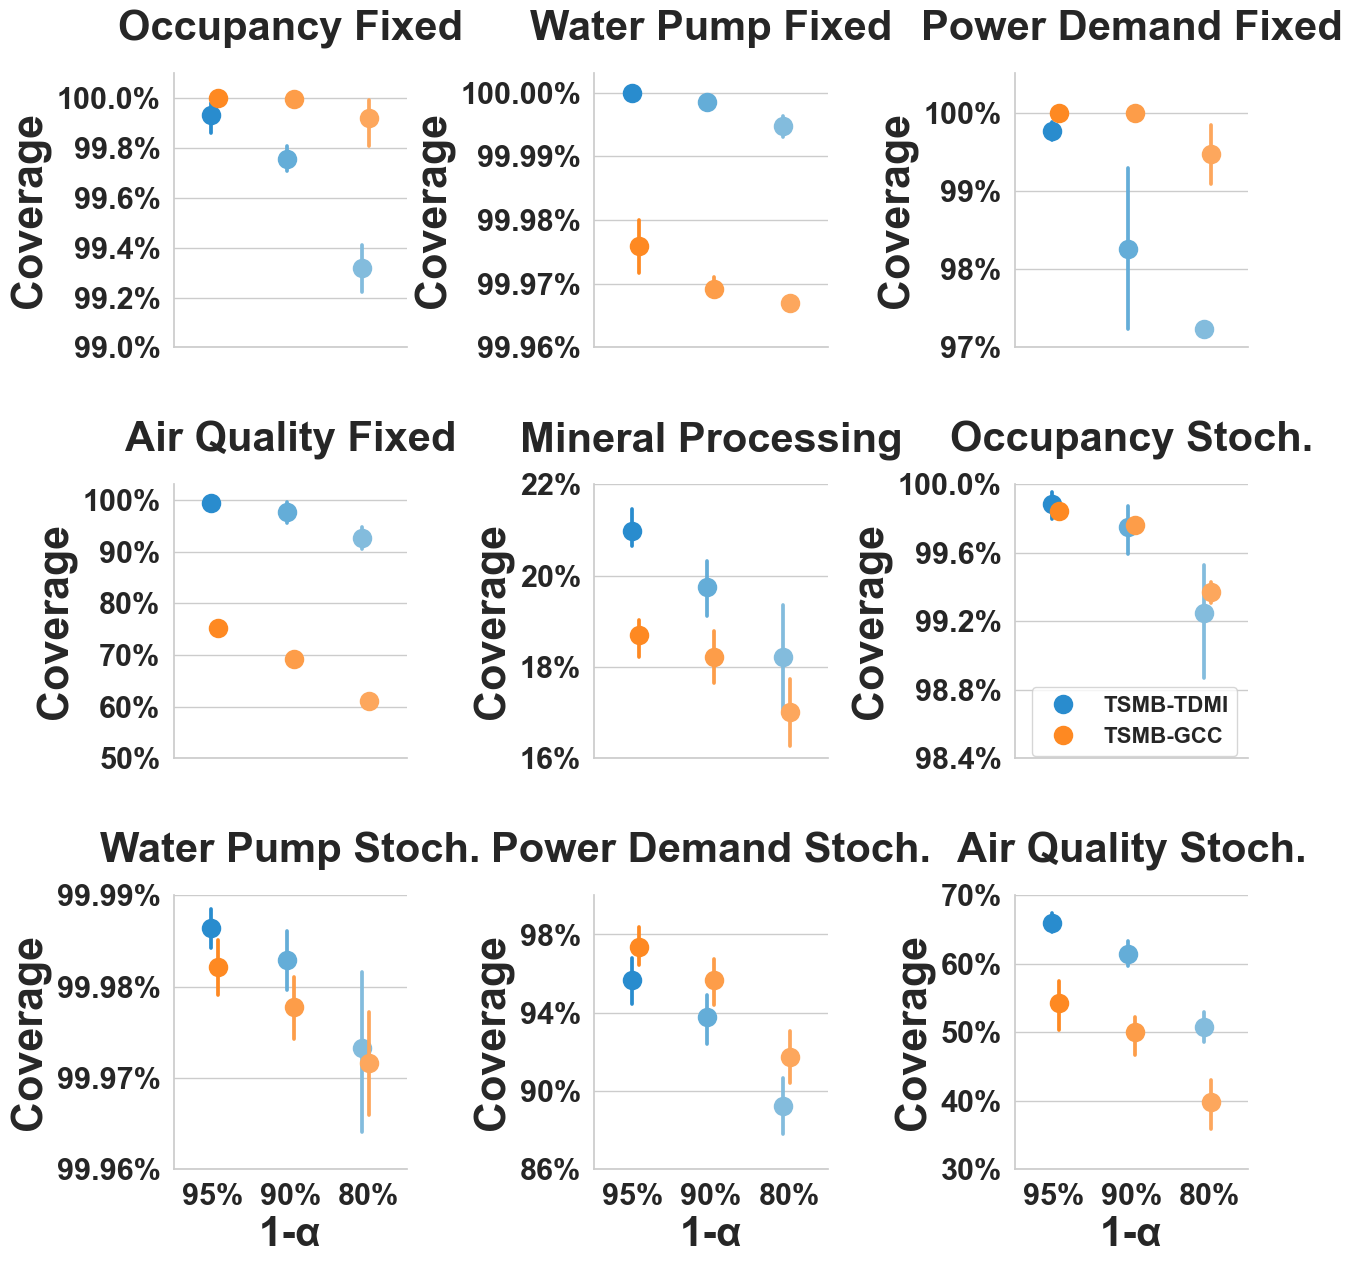

In [15]:
confidence_tsmb['Dataset'] = confidence_tsmb['Dataset'].replace('Stochastic', 'Stoch.', regex=True)

new_xticks = ['95%', '90%', '80%']
confidence_tsmb['method'] = pd.Categorical(confidence_tsmb['method'], categories=new_xticks, ordered=True)

g = sns.FacetGrid(confidence_tsmb, col="Dataset", height=4, sharey=False, col_wrap=3, col_order=col_order)
g.map_dataframe(sns.pointplot, x='method',  y="coverage", hue='Method name', linestyles='', palette=custom_palette, dodge=True, markersize=12)
g.set_titles(col_template="{col_name}", size=30, fontweight='bold', y=1.09)
g.set_xticklabels(new_xticks, fontsize=22)
g.set_yticklabels(fontsize=22)
plt.subplots_adjust(wspace=0.8, hspace=0.5)

for ax in g.axes.flat:
    for point in ax.collections:
        point.set_sizes([80])
        
for i, ax in enumerate(g.axes.flat):
    if i == 0:
        ax.set_ylim(0.99, 1.001)
        ax.set_yticks([0.990, 0.992, 0.994, 0.996, 0.998, 1])
    elif i == 1:
        ax.set_ylim(0.9996, 1.00003)
        ax.set_yticks([0.9996, 0.9997, 0.9998, 0.9999, 1])
    elif i == 3:
        ax.set_ylim(0.5, 1.03)
        ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1])
    elif i == 5:
        ax.set_ylim(0.984, 1)
        ax.set_yticks([0.984, 0.988, 0.992, 0.996, 1])
    else:
        ax.set_yticks(ax.get_yticks()[::2])

        
for i, ax in enumerate(g.axes.flat):
    ax.set_ylabel("Coverage", fontsize = 31)
    if i in [0, 5]:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.1f}%'))
    elif i in [1, 6]:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.2f}%'))
    else:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.0f}%'))
        

g.set_xlabels('1-α', fontsize = 30)
plt.legend([g.axes[0].get_children()[26], g.axes[0].get_children()[29]], ['TSMB-TDMI', 'TSMB-GCC'], 
           bbox_to_anchor=(1, 1.8),ncol=1, fontsize=16)

In [16]:
g.savefig("gbdt_coverage.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


### top

* tsmb_top

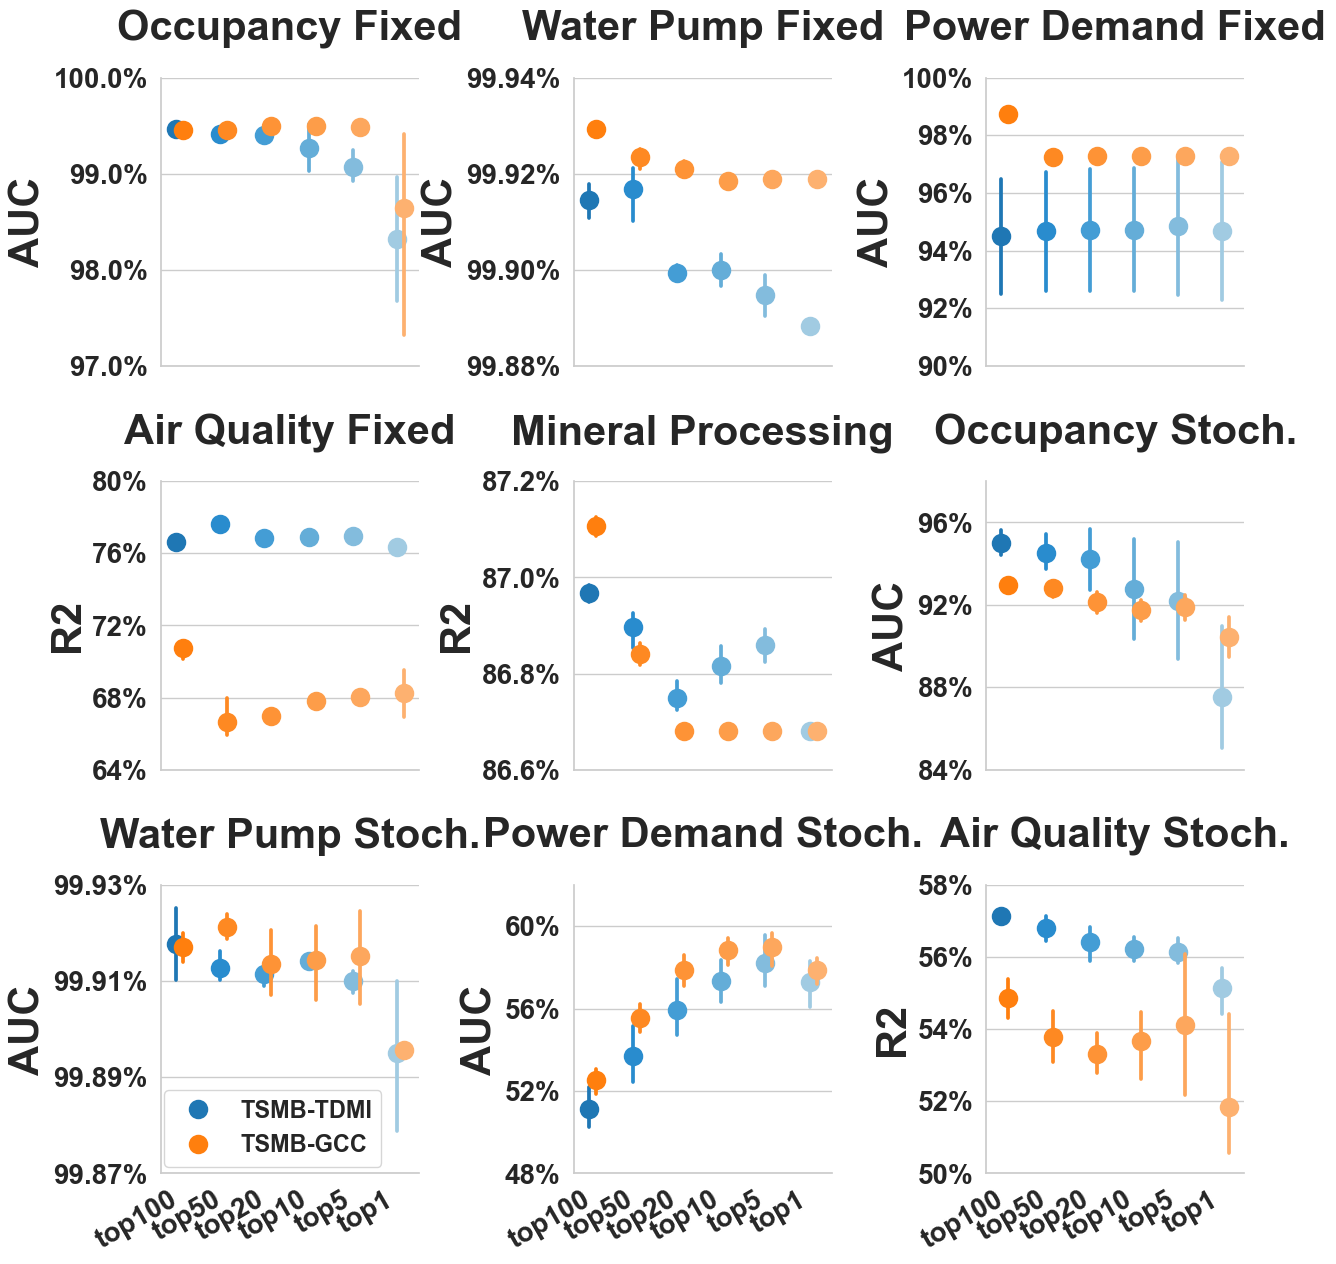

In [17]:
tsmb_top['Dataset'] = tsmb_top['Dataset'].replace('Stochastic', 'Stoch.', regex=True)

g = sns.FacetGrid(tsmb_top, col="Dataset", height=4, sharey=False, col_wrap=3, col_order=col_order)
g.map_dataframe(sns.pointplot, x='method',  y="test_values", hue='Method name', linestyles='', palette=custom_palette, dodge=True, markersize=12)
g.set_titles(col_template="{col_name}", size=30, fontweight='bold', y=1.1)
g.set_xticklabels(rotation=30, horizontalalignment='right', fontsize=20)
g.set_yticklabels(fontsize=20)
plt.subplots_adjust(wspace=0.6, hspace=0.4)

for ax in g.axes.flat:
    for point in ax.collections:
        point.set_sizes([80])
        
tick_labels = ['top100', 'top50', 'top20', 'top10', 'top5', 'top1']
num_ticks = len(tick_labels)
for ax in g.axes.flat:
    ax.set_xticks(range(num_ticks))
    ax.set_xticklabels(tick_labels, rotation=30, horizontalalignment='right')
        
for i, ax in enumerate(g.axes.flat):
    if i == 2:
        ax.set_ylim(0.9, 1)
        ax.set_yticks([0.9, 0.92, 0.94, 0.96, 0.98, 1])
    else:
        ax.set_yticks(ax.get_yticks()[::2])


for i, ax in enumerate(g.axes.flat):
    if i in [0, 4]:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.1f}%'))
    elif i in [1, 6]:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.2f}%'))
    else:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.0f}%'))
        
for i, ax in enumerate(g.axes.flat):
    if i in [0, 1, 2, 5, 6, 7]:
        ax.set_ylabel("AUC", fontsize = 30)
    else:
        ax.set_ylabel("R2", fontsize = 30)

g.set_xlabels('')
plt.legend([g.axes[0].get_children()[0], g.axes[0].get_children()[42]], ['TSMB-TDMI', 'TSMB-GCC'], 
           bbox_to_anchor=(-2.3, 0.33),ncol=1, fontsize=17)

In [18]:
g.savefig("gbdt_tsmb_top.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


* perturbed_top

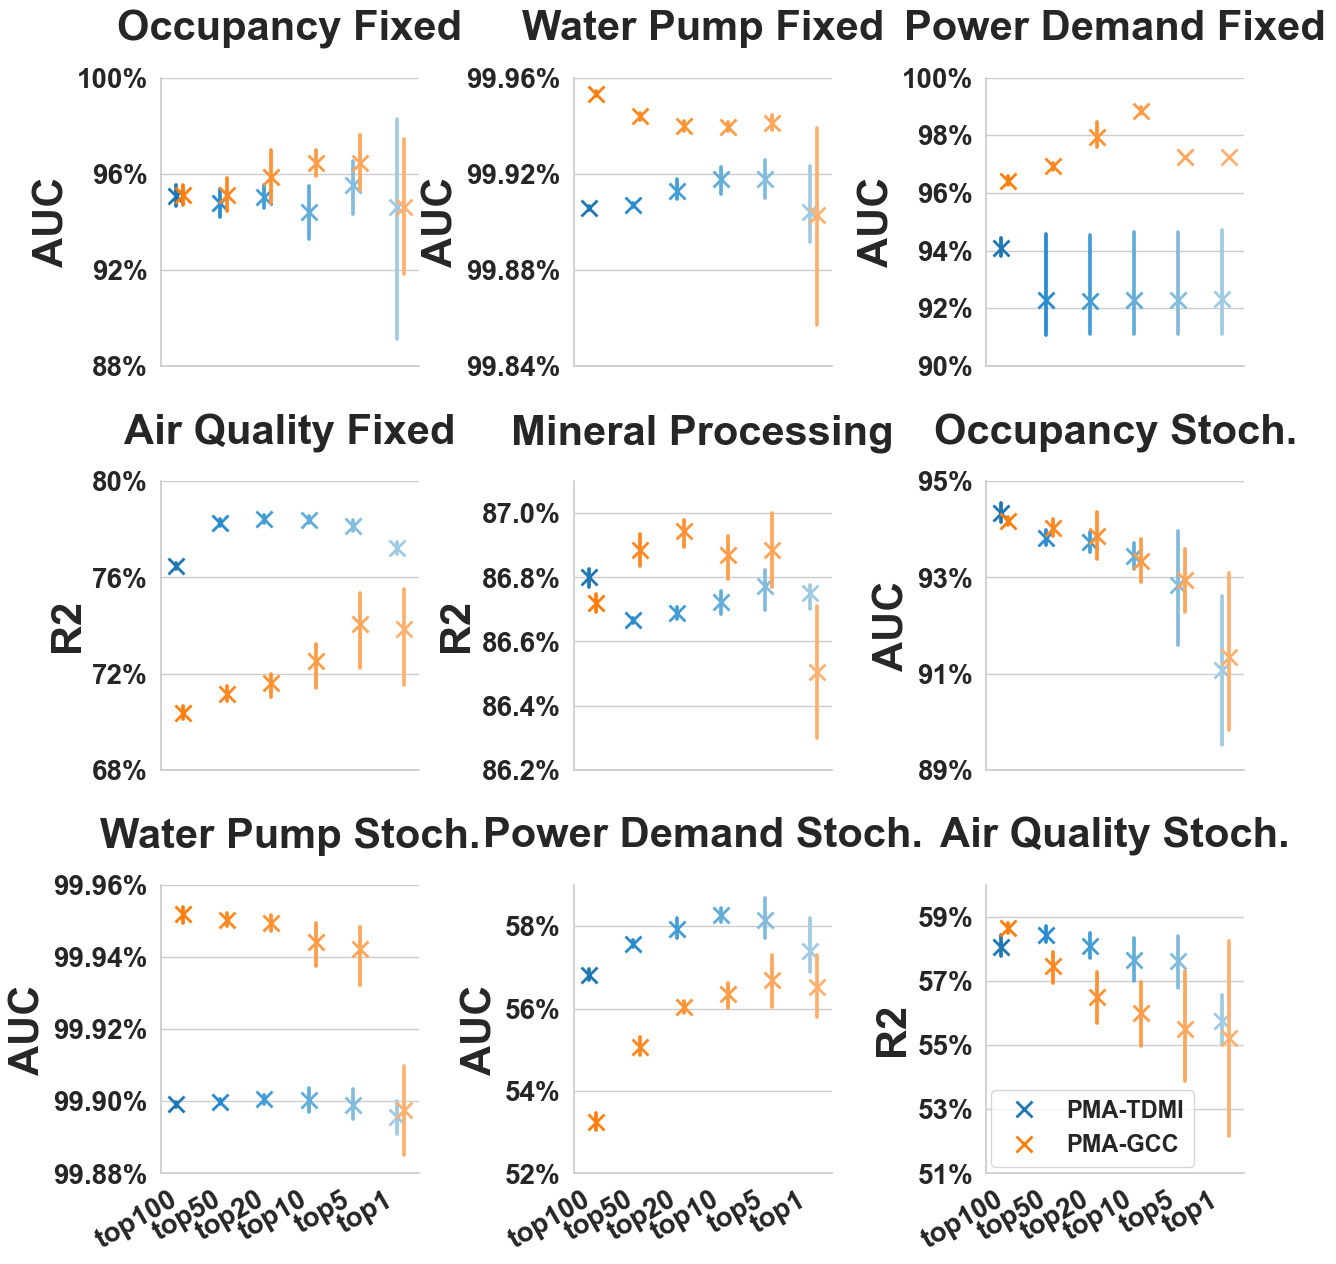

In [19]:
perturbed_top['Dataset'] = perturbed_top['Dataset'].replace('Stochastic', 'Stoch.', regex=True)

g = sns.FacetGrid(perturbed_top, col="Dataset", height=4, sharey=False, col_wrap=3, col_order=col_order)
g.map_dataframe(sns.pointplot, x='method',  y="test_values", hue='Method name', linestyles='', palette=custom_palette, dodge=True, markers='x', markersize=12)
g.set_titles(col_template="{col_name}", size=30, fontweight='bold', y=1.1)
g.set_xticklabels(rotation=30, horizontalalignment='right', fontsize=20)
g.set_yticklabels(fontsize=20)
plt.subplots_adjust(wspace=0.6, hspace=0.4)

for ax in g.axes.flat:
    for point in ax.collections:
        point.set_sizes([80])
        
tick_labels = ['top100', 'top50', 'top20', 'top10', 'top5', 'top1']
num_ticks = len(tick_labels)
for ax in g.axes.flat:
    ax.set_xticks(range(num_ticks))
    ax.set_xticklabels(tick_labels, rotation=30, horizontalalignment='right')

for i, ax in enumerate(g.axes.flat):
    ax.set_yticks(ax.get_yticks()[::2])
    if i in [4]:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.1f}%'))
    elif i in [1, 6]:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.2f}%'))
    else:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.0f}%'))
        
for i, ax in enumerate(g.axes.flat):
    if i in [0, 1, 2, 5, 6, 7]:
        ax.set_ylabel("AUC", fontsize = 30)
    else:
        ax.set_ylabel("R2", fontsize = 30)

g.set_xlabels('')
plt.legend([g.axes[0].get_children()[0], g.axes[0].get_children()[42]], ['PMA-TDMI', 'PMA-GCC'], 
           bbox_to_anchor=(0.85, 0.33),ncol=1, fontsize=17)

In [20]:
g.savefig("gbdt_perturbed_top.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


* tdb_top

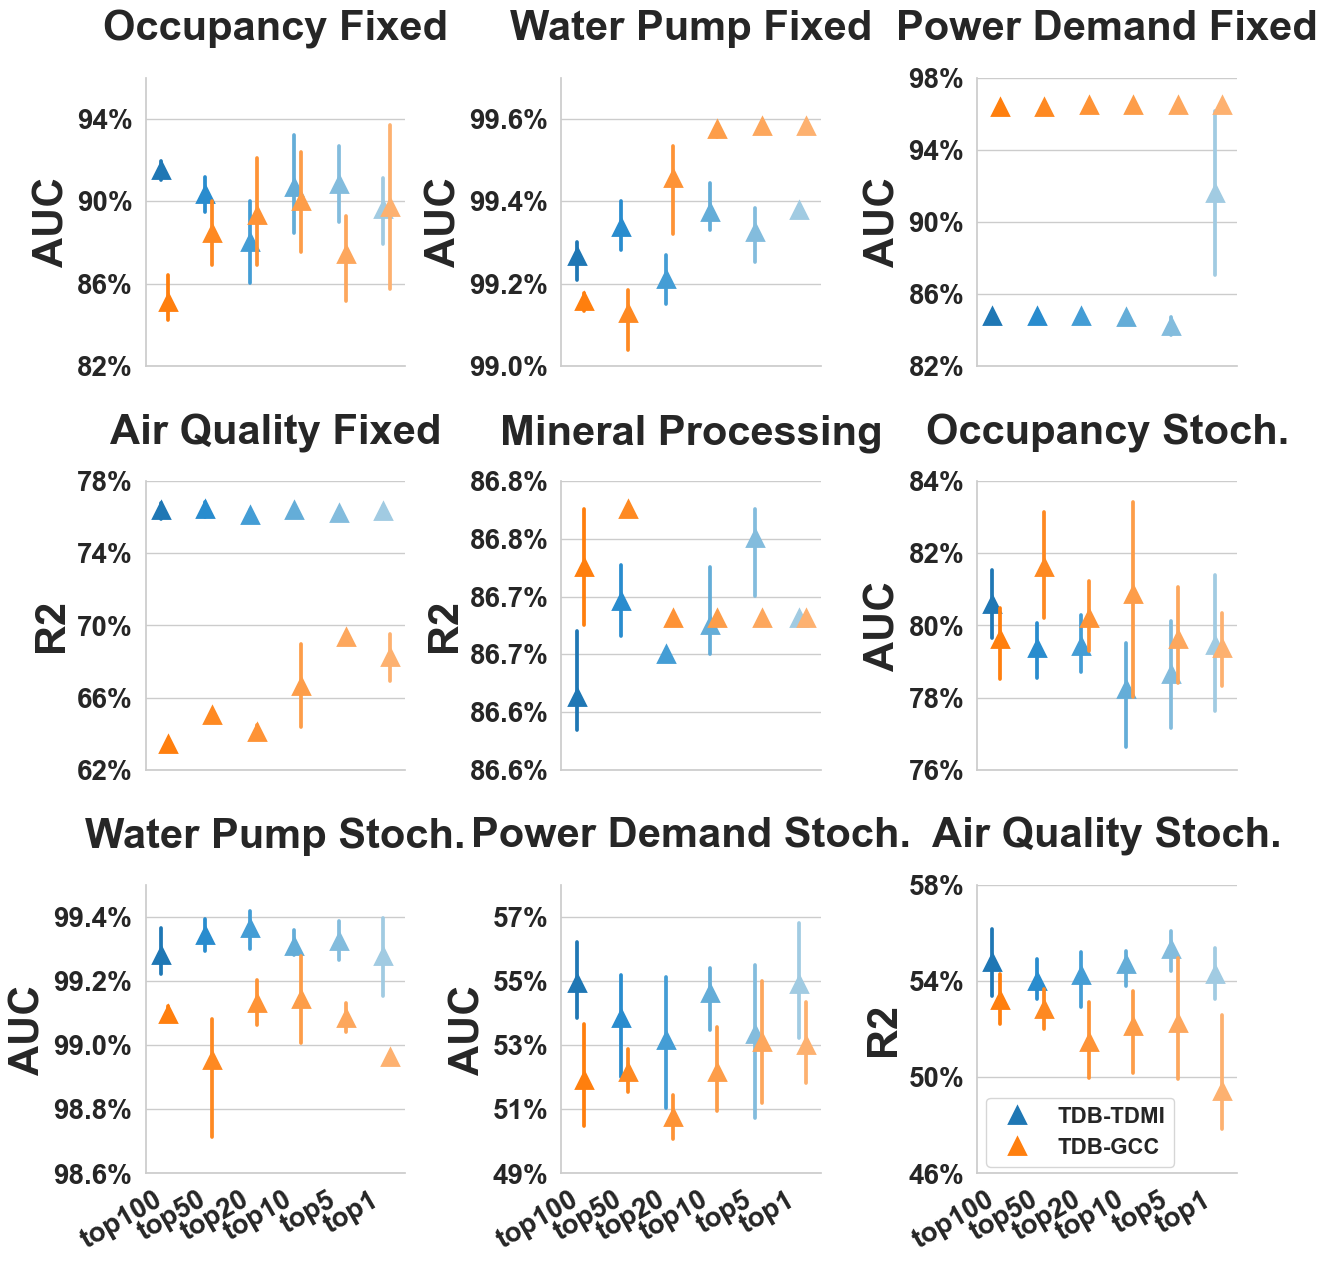

In [21]:
tdb_top['Dataset'] = tdb_top['Dataset'].replace('Stochastic', 'Stoch.', regex=True)

g = sns.FacetGrid(tdb_top, col="Dataset", height=4, sharey=False, col_wrap=3, col_order=col_order)
g.map_dataframe(sns.pointplot, x='method',  y="test_values", hue='Method name', linestyles='', palette=custom_palette, dodge=True, markers='^', markersize=12)
g.set_titles(col_template="{col_name}", size=30, fontweight='bold', y=1.1)
g.set_xticklabels(rotation=30, horizontalalignment='right', fontsize=20)
g.set_yticklabels(fontsize=20)
plt.subplots_adjust(wspace=0.6, hspace=0.4)

for ax in g.axes.flat:
    for point in ax.collections:
        point.set_sizes([80])
        
tick_labels = ['top100', 'top50', 'top20', 'top10', 'top5', 'top1']
num_ticks = len(tick_labels)
for ax in g.axes.flat:
    ax.set_xticks(range(num_ticks))
    ax.set_xticklabels(tick_labels, rotation=30, horizontalalignment='right')

for i, ax in enumerate(g.axes.flat):
    ax.set_yticks(ax.get_yticks()[::2])
    if i in [1, 4, 6]:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.1f}%'))
    else:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.0f}%'))
        
for i, ax in enumerate(g.axes.flat):
    if i in [0, 1, 2, 5, 6, 7]:
        ax.set_ylabel("AUC", fontsize = 30)
    else:
        ax.set_ylabel("R2", fontsize = 30)

g.set_xlabels('')
plt.legend([g.axes[0].get_children()[0], g.axes[0].get_children()[42]], ['TDB-TDMI', 'TDB-GCC'], 
           bbox_to_anchor=(0.8, 0.3),ncol=1, fontsize=16)

In [22]:
g.savefig("gbdt_tdb_top.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


### select_b

* tsmb_select_b

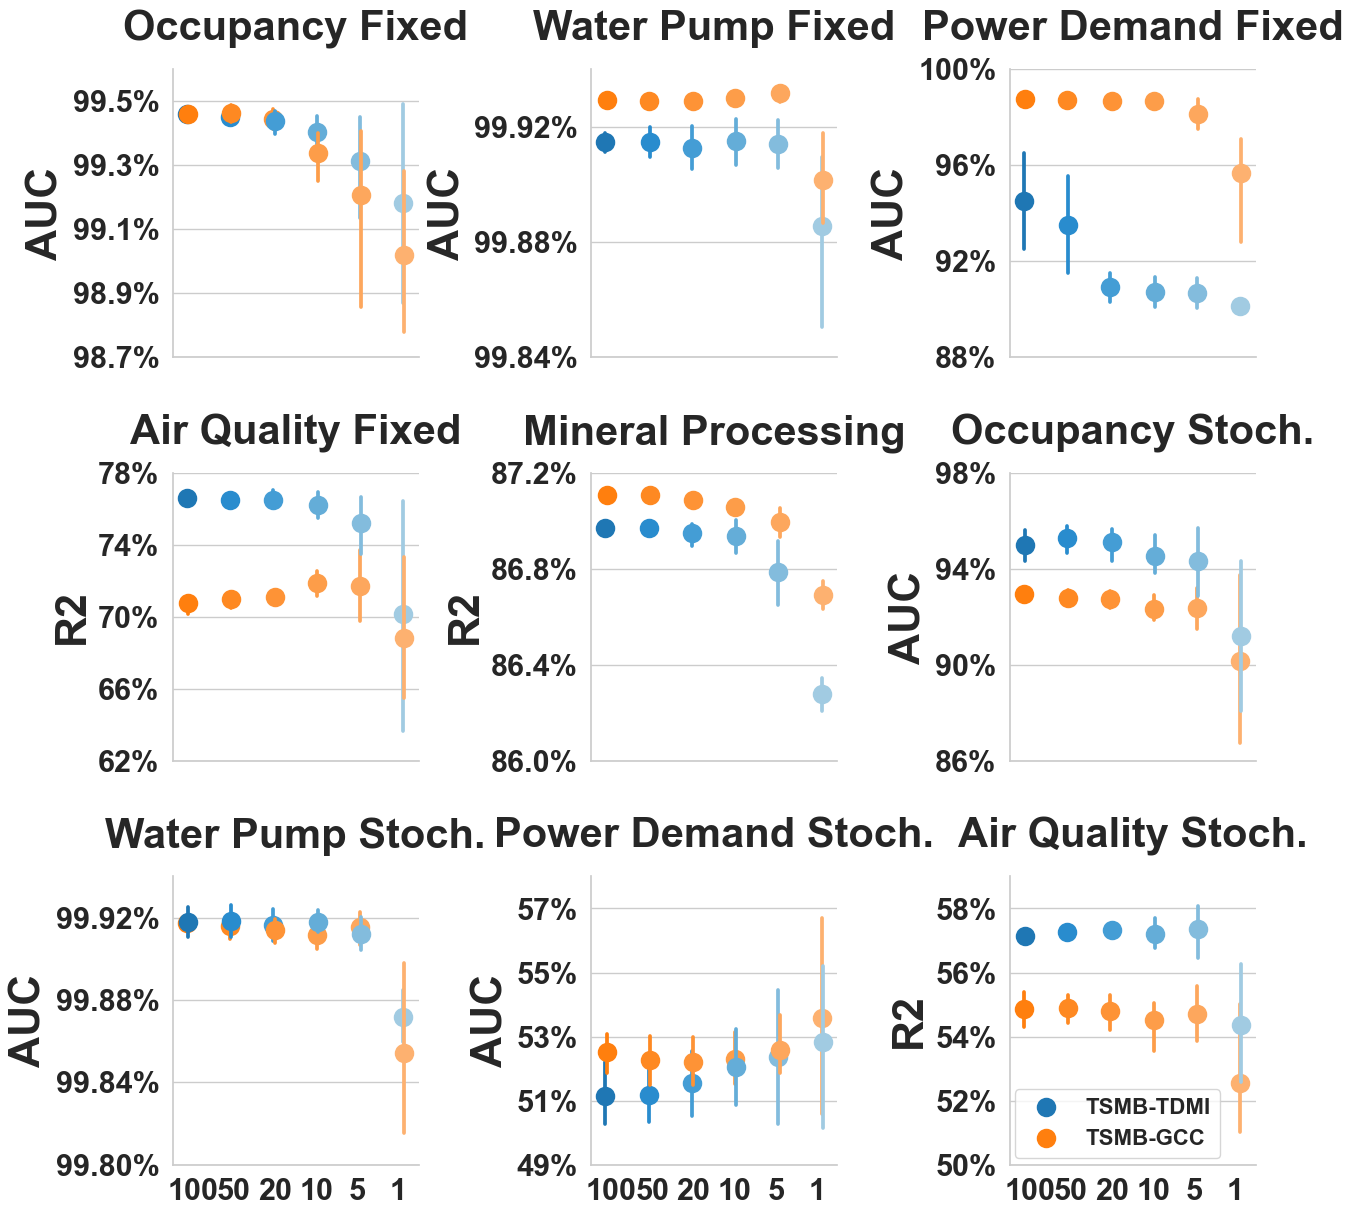

In [23]:
tsmb_select_b['Dataset'] = tsmb_select_b['Dataset'].replace('Stochastic', 'Stoch.', regex=True)

new_xticks = [100, 50, 20, 10, 5, 1]
tsmb_select_b['method'] = pd.Categorical(tsmb_select_b['method'], categories=new_xticks, ordered=True)

tsmb_select_b = tsmb_select_b.sort_values('method')
g = sns.FacetGrid(tsmb_select_b, col="Dataset", height=4, sharey=False, col_wrap=3, col_order=col_order)
g.map_dataframe(sns.pointplot, x='method',  y="test_values", hue='Method name', linestyles='', palette=custom_palette, dodge=True, markersize=12)
g.set_titles(col_template="{col_name}", size=30, fontweight='bold', y=1.07)
g.set_xticklabels([100, 50, 20, 10, 5, 1], fontsize=22)
g.set_yticklabels(fontsize=22)
g.set_xticklabels
plt.subplots_adjust(wspace=0.7, hspace=0.4)

for ax in g.axes.flat:
    for point in ax.collections:
        point.set_sizes([80])
        
tick_labels = ['100', '50', '20', '10', '5', '1']
num_ticks = len(tick_labels)
for ax in g.axes.flat:
    ax.set_xticks(range(num_ticks))
    ax.set_xticklabels(tick_labels)

for i, ax in enumerate(g.axes.flat):
    ax.set_yticks(ax.get_yticks()[::2])
    if i in [0, 4]:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.1f}%'))
    elif i in [1, 6]:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.2f}%'))
    else:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.0f}%'))
        
for i, ax in enumerate(g.axes.flat):
    if i in [0, 1, 2, 5, 6, 7]:
        ax.set_ylabel("AUC", fontsize = 31)
    else:
        ax.set_ylabel("R2", fontsize = 31)

g.set_xlabels('')
plt.legend([g.axes[0].get_children()[0], g.axes[0].get_children()[7]], ['TSMB-TDMI', 'TSMB-GCC'], 
           bbox_to_anchor=(0.9, 0.3),ncol=1, fontsize=16)

In [24]:
g.savefig("gbdt_tsmb_select_b.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


* perturbed_select_b

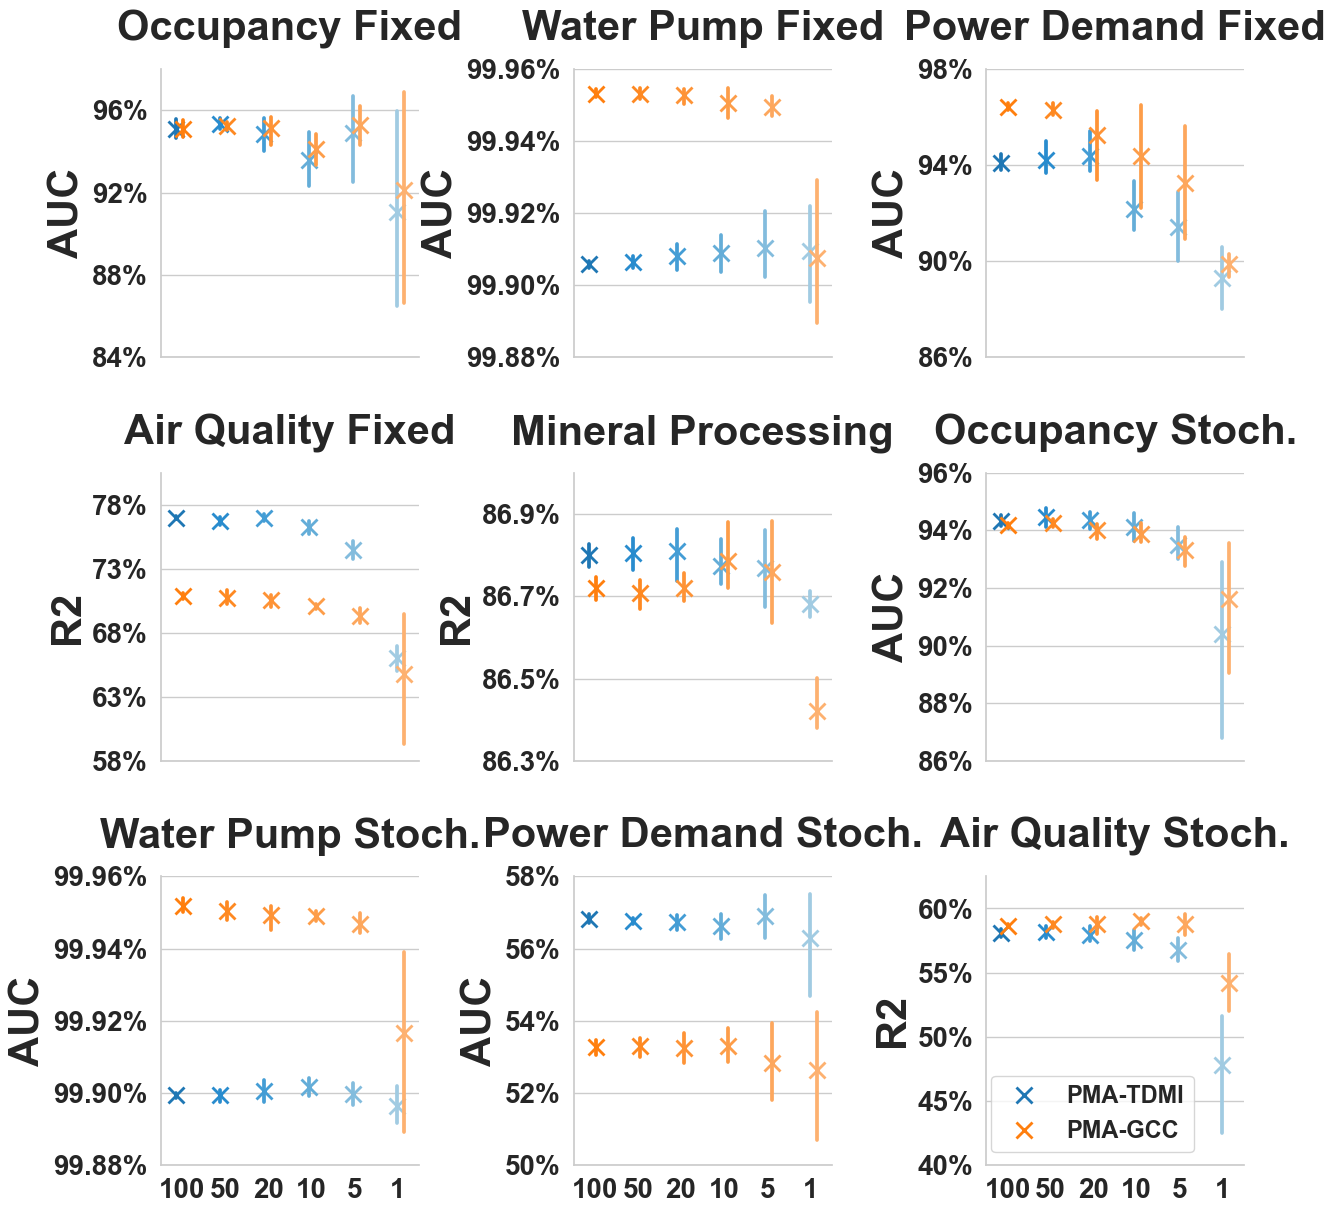

In [25]:
perturbed_select_b['Dataset'] = perturbed_select_b['Dataset'].replace('Stochastic', 'Stoch.', regex=True)

new_xticks = [100, 50, 20, 10, 5, 1]
perturbed_select_b['method'] = pd.Categorical(perturbed_select_b['method'], categories=new_xticks, ordered=True)

g = sns.FacetGrid(perturbed_select_b, col="Dataset", height=4, sharey=False, col_wrap=3, col_order=col_order)
g.map_dataframe(sns.pointplot, x='method',  y="test_values", hue='Method name', linestyles='', palette=custom_palette, dodge=True, markers='x', markersize=12)
g.set_titles(col_template="{col_name}", size=30, fontweight='bold', y=1.07)
g.set_xticklabels(fontsize=20)
g.set_yticklabels(fontsize=20)
plt.subplots_adjust(wspace=0.6, hspace=0.4)

for ax in g.axes.flat:
    for point in ax.collections:
        point.set_sizes([80])
        
tick_labels = ['100', '50', '20', '10', '5', '1']
num_ticks = len(tick_labels)
for ax in g.axes.flat:
    ax.set_xticks(range(num_ticks))
    ax.set_xticklabels(tick_labels)

for i, ax in enumerate(g.axes.flat):
    ax.set_yticks(ax.get_yticks()[::2])
    if i in [4]:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.1f}%'))
    elif i in [1, 6]:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.2f}%'))
    else:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.0f}%'))
        
for i, ax in enumerate(g.axes.flat):
    if i in [0, 1, 2, 5, 6, 7]:
        ax.set_ylabel("AUC", fontsize = 30)
    else:
        ax.set_ylabel("R2", fontsize = 30)

g.set_xlabels('')
plt.legend([g.axes[0].get_children()[0], g.axes[0].get_children()[42]], ['PMA-TDMI', 'PMA-GCC'], 
           bbox_to_anchor=(0.85, 0.35),ncol=1, fontsize=17)

In [26]:
g.savefig("gbdt_perturbed_select_b.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


* tdb_select_b

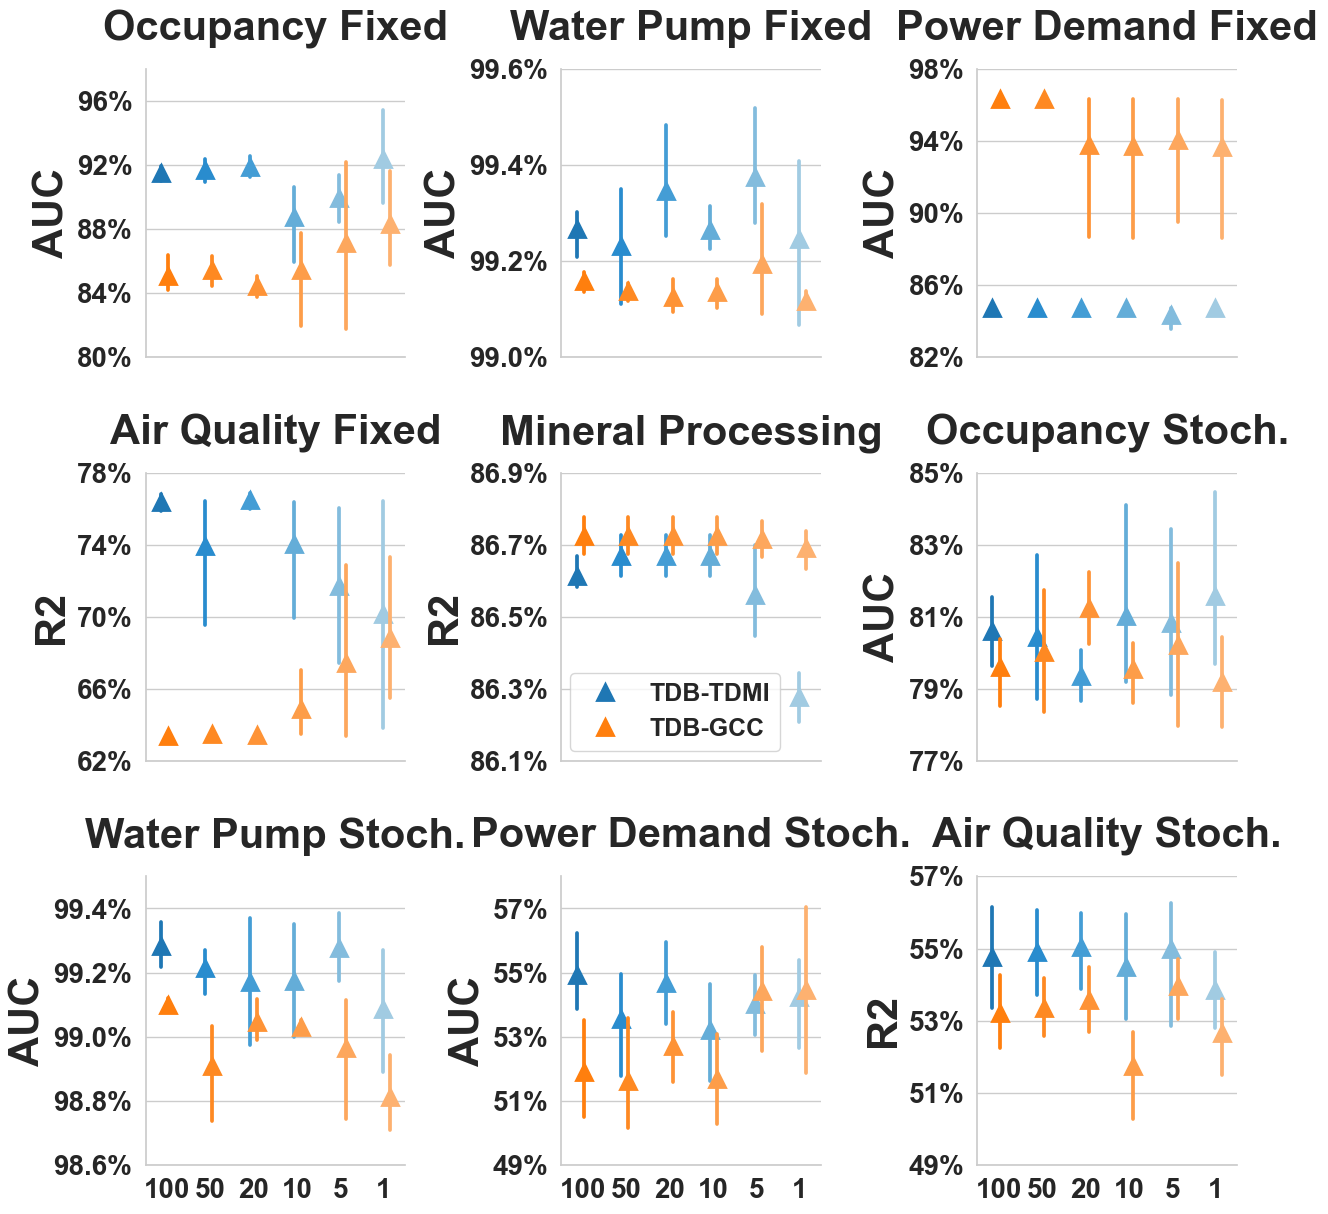

In [27]:
tdb_select_b['Dataset'] = tdb_select_b['Dataset'].replace('Stochastic', 'Stoch.', regex=True)

new_xticks = [100, 50, 20, 10, 5, 1]
tdb_select_b['method'] = pd.Categorical(tdb_select_b['method'], categories=new_xticks, ordered=True)

g = sns.FacetGrid(tdb_select_b, col="Dataset", height=4, sharey=False, col_wrap=3, col_order=col_order)
g.map_dataframe(sns.pointplot, x='method',  y="test_values", hue='Method name', linestyles='', palette=custom_palette, dodge=True, markers='^', markersize=12)
g.set_titles(col_template="{col_name}", size=30, fontweight='bold', y=1.07)
g.set_xticklabels(fontsize=20)
g.set_yticklabels(fontsize=20)
plt.subplots_adjust(wspace=0.6, hspace=0.4)

for ax in g.axes.flat:
    for point in ax.collections:
        point.set_sizes([80])
        
tick_labels = ['100', '50', '20', '10', '5', '1']
num_ticks = len(tick_labels)
for ax in g.axes.flat:
    ax.set_xticks(range(num_ticks))
    ax.set_xticklabels(tick_labels)

for i, ax in enumerate(g.axes.flat):
    ax.set_yticks(ax.get_yticks()[::2])
    if i in [1, 4, 6]:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.1f}%'))
    else:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.0f}%'))
        
for i, ax in enumerate(g.axes.flat):
    if i in [0, 1, 2, 5, 6, 7]:
        ax.set_ylabel("AUC", fontsize = 30)
    else:
        ax.set_ylabel("R2", fontsize = 30)

g.set_xlabels('')
plt.legend([g.axes[0].get_children()[0], g.axes[0].get_children()[42]], ['TDB-TDMI', 'TDB-GCC'], 
           bbox_to_anchor=(-0.71, 1.75),ncol=1, fontsize=18)

In [28]:
g.savefig("gbdt_tdb_select_b.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


### distribution

In [29]:
def reverse_delta(deltas, dicts):
    reverse_deltas = (deltas - dicts['delta'][0]) / (dicts['delta'][1] - dicts['delta'][0])
    return reverse_deltas

mineral_reverse_cc_deltas = reverse_delta(deltas=fixed_mineral_o_cc['avg_delta'], dicts={'delta': (0.0, 90.0), 'window_size': (1.0, 600.0)})
mineral_reverse_mi_deltas = reverse_delta(deltas=fixed_mineral_o_mi['avg_delta'], dicts={'delta': (0.0, 90.0), 'window_size': (1.0, 600.0)})

fixed_air_reverse_cc_deltas = reverse_delta(deltas=fixed_air_o_cc['avg_delta'], dicts={'delta': (60.0, 1440.0), 'window_size': (1.0, 10800.0)})
fixed_air_reverse_mi_deltas = reverse_delta(deltas=fixed_air_o_mi['avg_delta'], dicts={'delta': (60.0, 1440.0), 'window_size': (1.0, 10800.0)})
stochastic_air_reverse_cc_deltas = reverse_delta(deltas=stochastic_air_o_cc['avg_delta'], dicts={'delta': (60.0, 1440.0), 'window_size': (1.0, 10800.0)})
stochastic_air_reverse_mi_deltas = reverse_delta(deltas=stochastic_air_o_mi['avg_delta'], dicts={'delta': (60.0, 1440.0), 'window_size': (1.0, 10800.0)})
air_reverse_real_deltas0 = reverse_delta(deltas=np.array([1320, 1320, 1020, 1020, 720, 420, 420, 420]), dicts=constants.AIR_QUALITY_TD_RANGE)
air_reverse_real_deltas1 = reverse_delta(deltas=np.array([1260, 1260, 960, 960, 660, 360, 360, 360]), dicts=constants.AIR_QUALITY_TD_RANGE)
air_reverse_real_deltas2 = reverse_delta(deltas=np.array([1200, 1200, 900, 900, 600, 300, 300, 300]), dicts=constants.AIR_QUALITY_TD_RANGE)
air_reverse_real_deltas3 = reverse_delta(deltas=np.array([1140, 1140, 840, 840, 540, 240, 240, 240]), dicts=constants.AIR_QUALITY_TD_RANGE)
air_reverse_real_deltas4 = reverse_delta(deltas=np.array([1080, 1080, 780, 780, 480, 180, 180, 180]), dicts=constants.AIR_QUALITY_TD_RANGE)

fixed_occupancy_reverse_cc_deltas = reverse_delta(deltas=fixed_occupancy_o_cc['avg_delta'], dicts=constants.OCCUPANCY_TD_RANGE)
fixed_occupancy_reverse_mi_deltas = reverse_delta(deltas=fixed_occupancy_o_mi['avg_delta'], dicts=constants.OCCUPANCY_TD_RANGE)
stochastic_occupancy_reverse_cc_deltas = reverse_delta(deltas=stochastic_occupancy_o_cc['avg_delta'], dicts=constants.OCCUPANCY_TD_RANGE)
stochastic_occupancy_reverse_mi_deltas = reverse_delta(deltas=stochastic_occupancy_o_mi['avg_delta'], dicts=constants.OCCUPANCY_TD_RANGE)
occupancy_reverse_real_deltas0 = reverse_delta(deltas=np.array([180, 140, 100, 80, 50]), dicts=constants.OCCUPANCY_TD_RANGE)
occupancy_reverse_real_deltas1 = reverse_delta(deltas=np.array([170, 130, 100, 70, 40]), dicts=constants.OCCUPANCY_TD_RANGE)
occupancy_reverse_real_deltas2 = reverse_delta(deltas=np.array([150, 120, 90, 60, 30]), dicts=constants.OCCUPANCY_TD_RANGE)
occupancy_reverse_real_deltas3 = reverse_delta(deltas=np.array([140, 110, 80, 70, 20]), dicts=constants.OCCUPANCY_TD_RANGE)
occupancy_reverse_real_deltas4 = reverse_delta(deltas=np.array([130, 110, 80, 50, 20]), dicts=constants.OCCUPANCY_TD_RANGE)

fixed_sensor_reverse_cc_deltas = reverse_delta(deltas=fixed_sensor_o_cc['avg_delta'], dicts={'delta': (10.0, 80.0), 'window_size': (1.0, 150.0)})
fixed_sensor_reverse_mi_deltas = reverse_delta(deltas=fixed_sensor_o_mi['avg_delta'], dicts={'delta': (10.0, 80.0), 'window_size': (1.0, 150.0)})
stochastic_sensor_reverse_cc_deltas = reverse_delta(deltas=stochastic_sensor_o_cc['avg_delta'], dicts={'delta': (10.0, 80.0), 'window_size': (1.0, 150.0)})
stochastic_sensor_reverse_mi_deltas = reverse_delta(deltas=stochastic_sensor_o_mi['avg_delta'], dicts={'delta': (10.0, 80.0), 'window_size': (1.0, 150.0)})
sensor_reverse_real_deltas0 = reverse_delta(deltas=np.array([75, 65, 50, 40, 30, 25]), dicts=constants.PUMP_SENSOR_TD_RANGE)
sensor_reverse_real_deltas1 = reverse_delta(deltas=np.array([70, 60, 45, 35, 25, 20]), dicts=constants.PUMP_SENSOR_TD_RANGE)
sensor_reverse_real_deltas2 = reverse_delta(deltas=np.array([65, 55, 40, 30, 20, 15]), dicts=constants.PUMP_SENSOR_TD_RANGE)
sensor_reverse_real_deltas3 = reverse_delta(deltas=np.array([60, 50, 35, 25, 15, 10]), dicts=constants.PUMP_SENSOR_TD_RANGE)
sensor_reverse_real_deltas4 = reverse_delta(deltas=np.array([55, 45, 30, 20, 10, 5]), dicts=constants.PUMP_SENSOR_TD_RANGE)

fixed_power_reverse_cc_deltas = reverse_delta(deltas=fixed_power_o_cc['avg_delta'], dicts = {'delta': (0.0, 10.0), 'window_size': (1.0, 1.0)})
fixed_power_reverse_mi_deltas = reverse_delta(deltas=fixed_power_o_mi['avg_delta'], dicts = {'delta': (0.0, 10.0), 'window_size': (1.0, 1.0)})
stochastic_power_reverse_cc_deltas = reverse_delta(deltas=stochastic_power_o_cc['avg_delta'], dicts = {'delta': (0.0, 10.0), 'window_size': (1.0, 1.0)})
stochastic_power_reverse_mi_deltas = reverse_delta(deltas=stochastic_power_o_mi['avg_delta'], dicts = {'delta': (0.0, 10.0), 'window_size': (1.0, 1.0)})
power_reverse_real_deltas0 = reverse_delta(deltas=np.array([9,9,9,9,9,9,9,9,7,7,7,7,7,7,7,7,5,5,5,5,5,5,5,5]), dicts=constants.POWER_DEMAND_TD_RANGE)
power_reverse_real_deltas1 = reverse_delta(deltas=np.array([8,8,8,8,8,8,8,8,6,6,6,6,6,6,6,6,4,4,4,4,4,4,4,4]), dicts=constants.POWER_DEMAND_TD_RANGE)
power_reverse_real_deltas2 = reverse_delta(deltas=np.array([7,7,7,7,7,7,7,7,5,5,5,5,5,5,5,5,3,3,3,3,3,3,3,3]), dicts=constants.POWER_DEMAND_TD_RANGE)
power_reverse_real_deltas3 = reverse_delta(deltas=np.array([6,6,6,6,6,6,6,6,4,4,4,4,4,4,4,4,2,2,2,2,2,2,2,2]), dicts=constants.POWER_DEMAND_TD_RANGE)
power_reverse_real_deltas4 = reverse_delta(deltas=np.array([5,5,5,5,5,5,5,5,3,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1]), dicts=constants.POWER_DEMAND_TD_RANGE)

* power_demand distribution

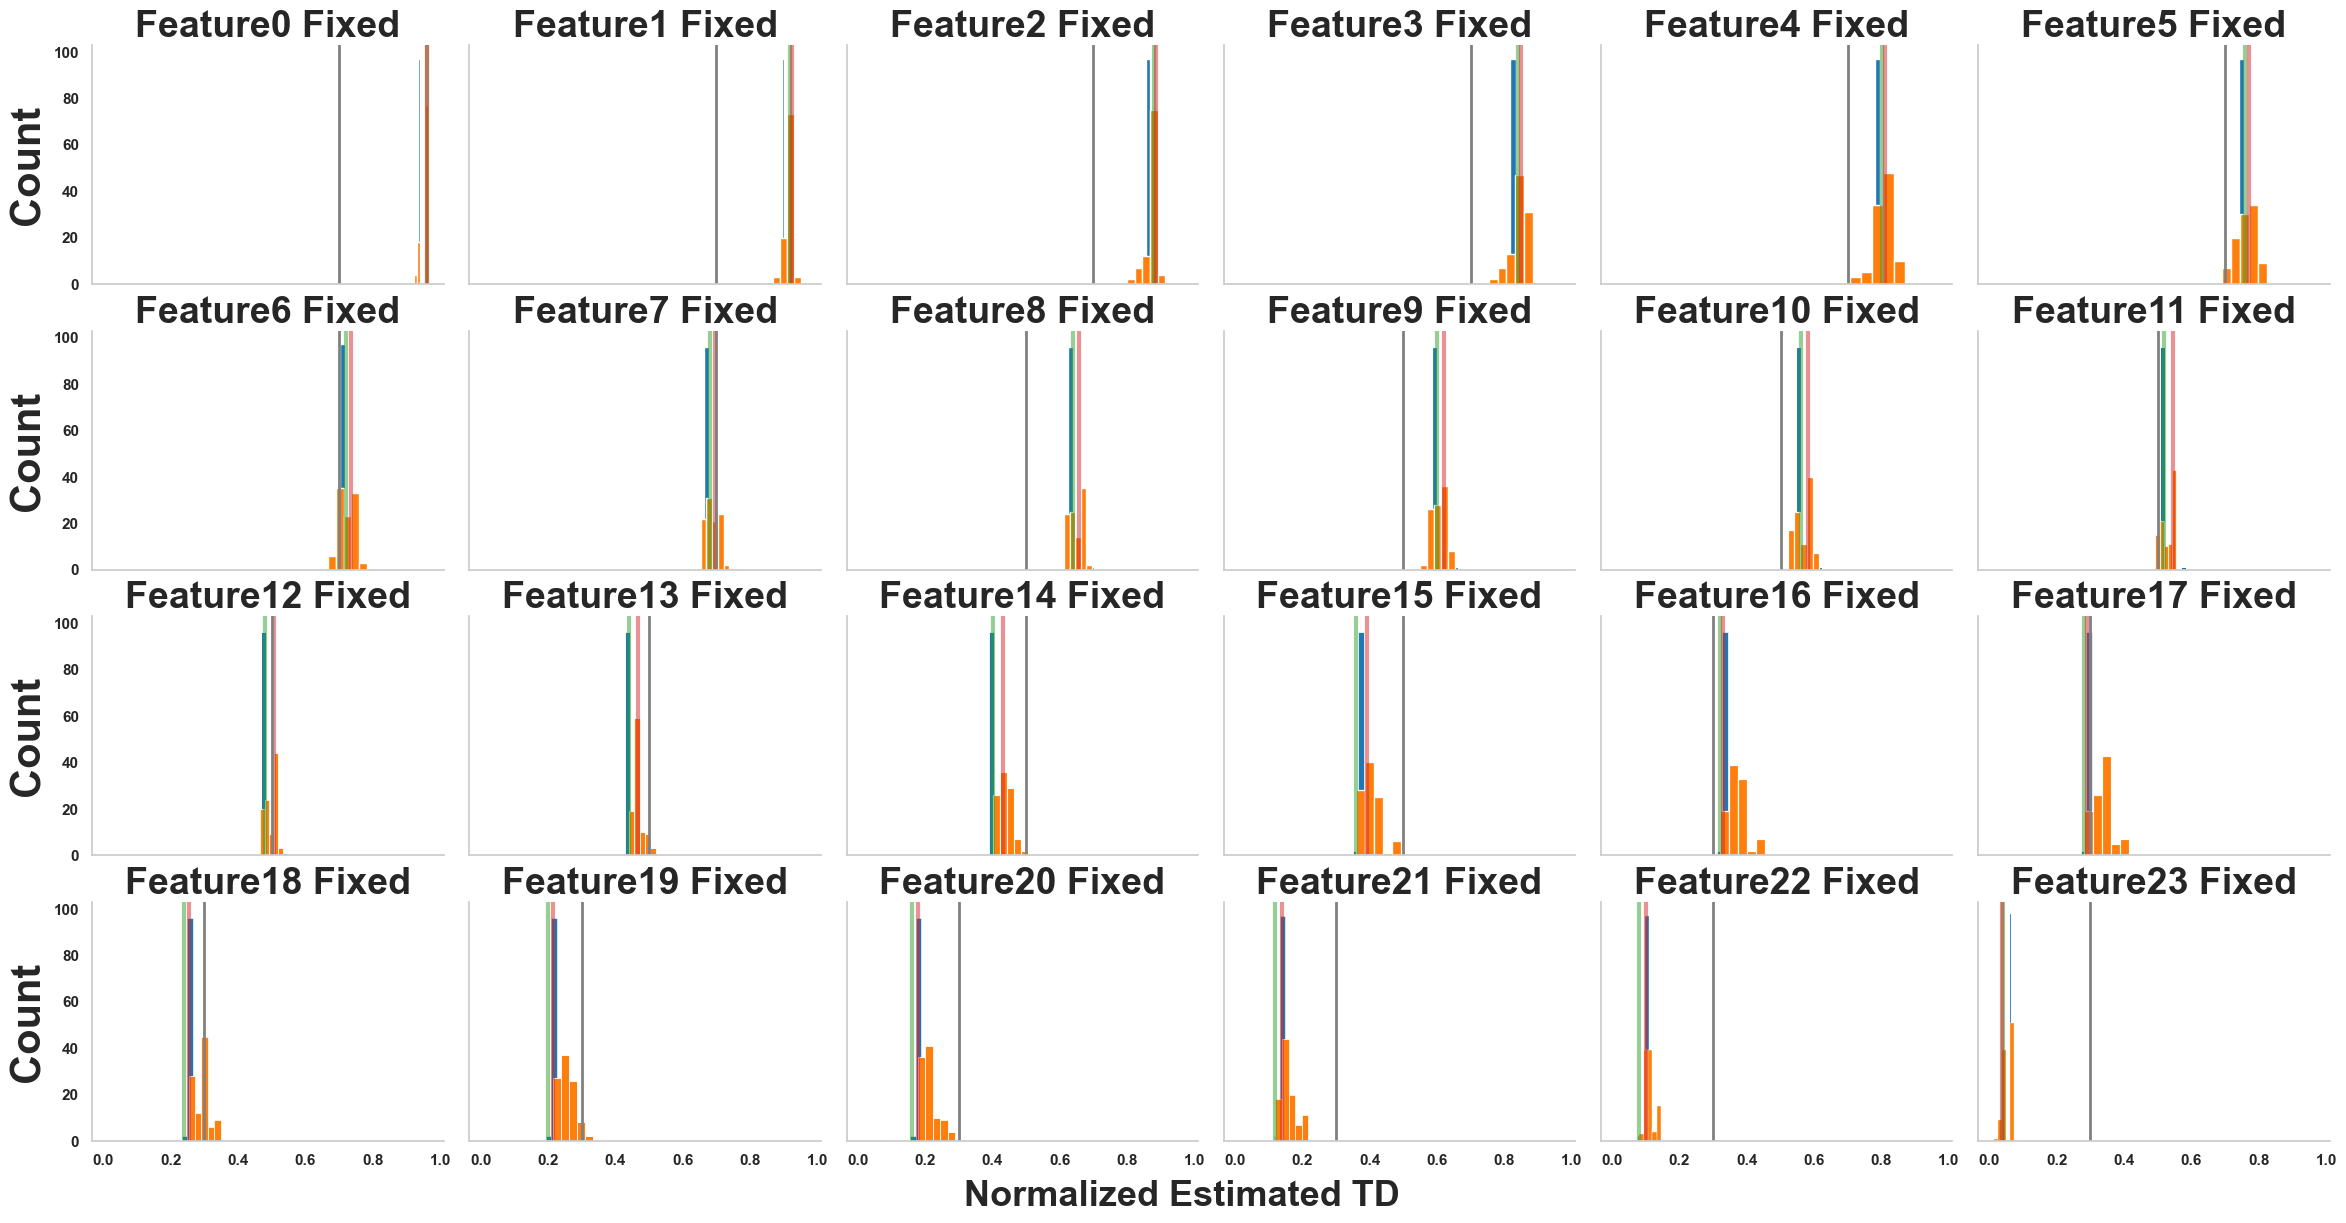

In [30]:
fixed_dis_power_demand['features'] = fixed_dis_power_demand['features'].replace('fixed', 'Fixed', regex=True)

with sns.axes_style("whitegrid", {'axes.grid': False}):
    g = sns.FacetGrid(fixed_dis_power_demand, col="features", col_wrap=6, aspect=1.3, hue='Method', palette=custom_palette)
    g.map_dataframe(sns.histplot, "deltas", bins=5, alpha=1, palette=custom_palette)

    for i, ax in enumerate(g.axes.flat):
        l1 = ax.axvline(x=fixed_power_reverse_mi_deltas[i], ymin=0, ymax=1, c=custom_palette['TDMI'], label='TDMI Time Delay', linewidth=3, alpha=0.5)
        l2 = ax.axvline(x=fixed_power_reverse_cc_deltas[i], ymin=0, ymax=1, c=custom_palette['GCC'], label='GCC Time Delay', linewidth=3, alpha=0.5)
        l3 = ax.axvline(x=power_reverse_real_deltas2[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=2)

    g.set_titles(col_template="{col_name}", size=27, fontweight='bold')
    g.set_xlabels('Normalized Estimated TD', fontsize = 30)
    g.set_ylabels('Count', fontsize = 30)

    g.set_xlabels('')
    plt.text(-2.4, -28, 'Normalized Estimated TD', ha='center', fontsize=26)

In [31]:
g.savefig("distribution_power_fixed.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


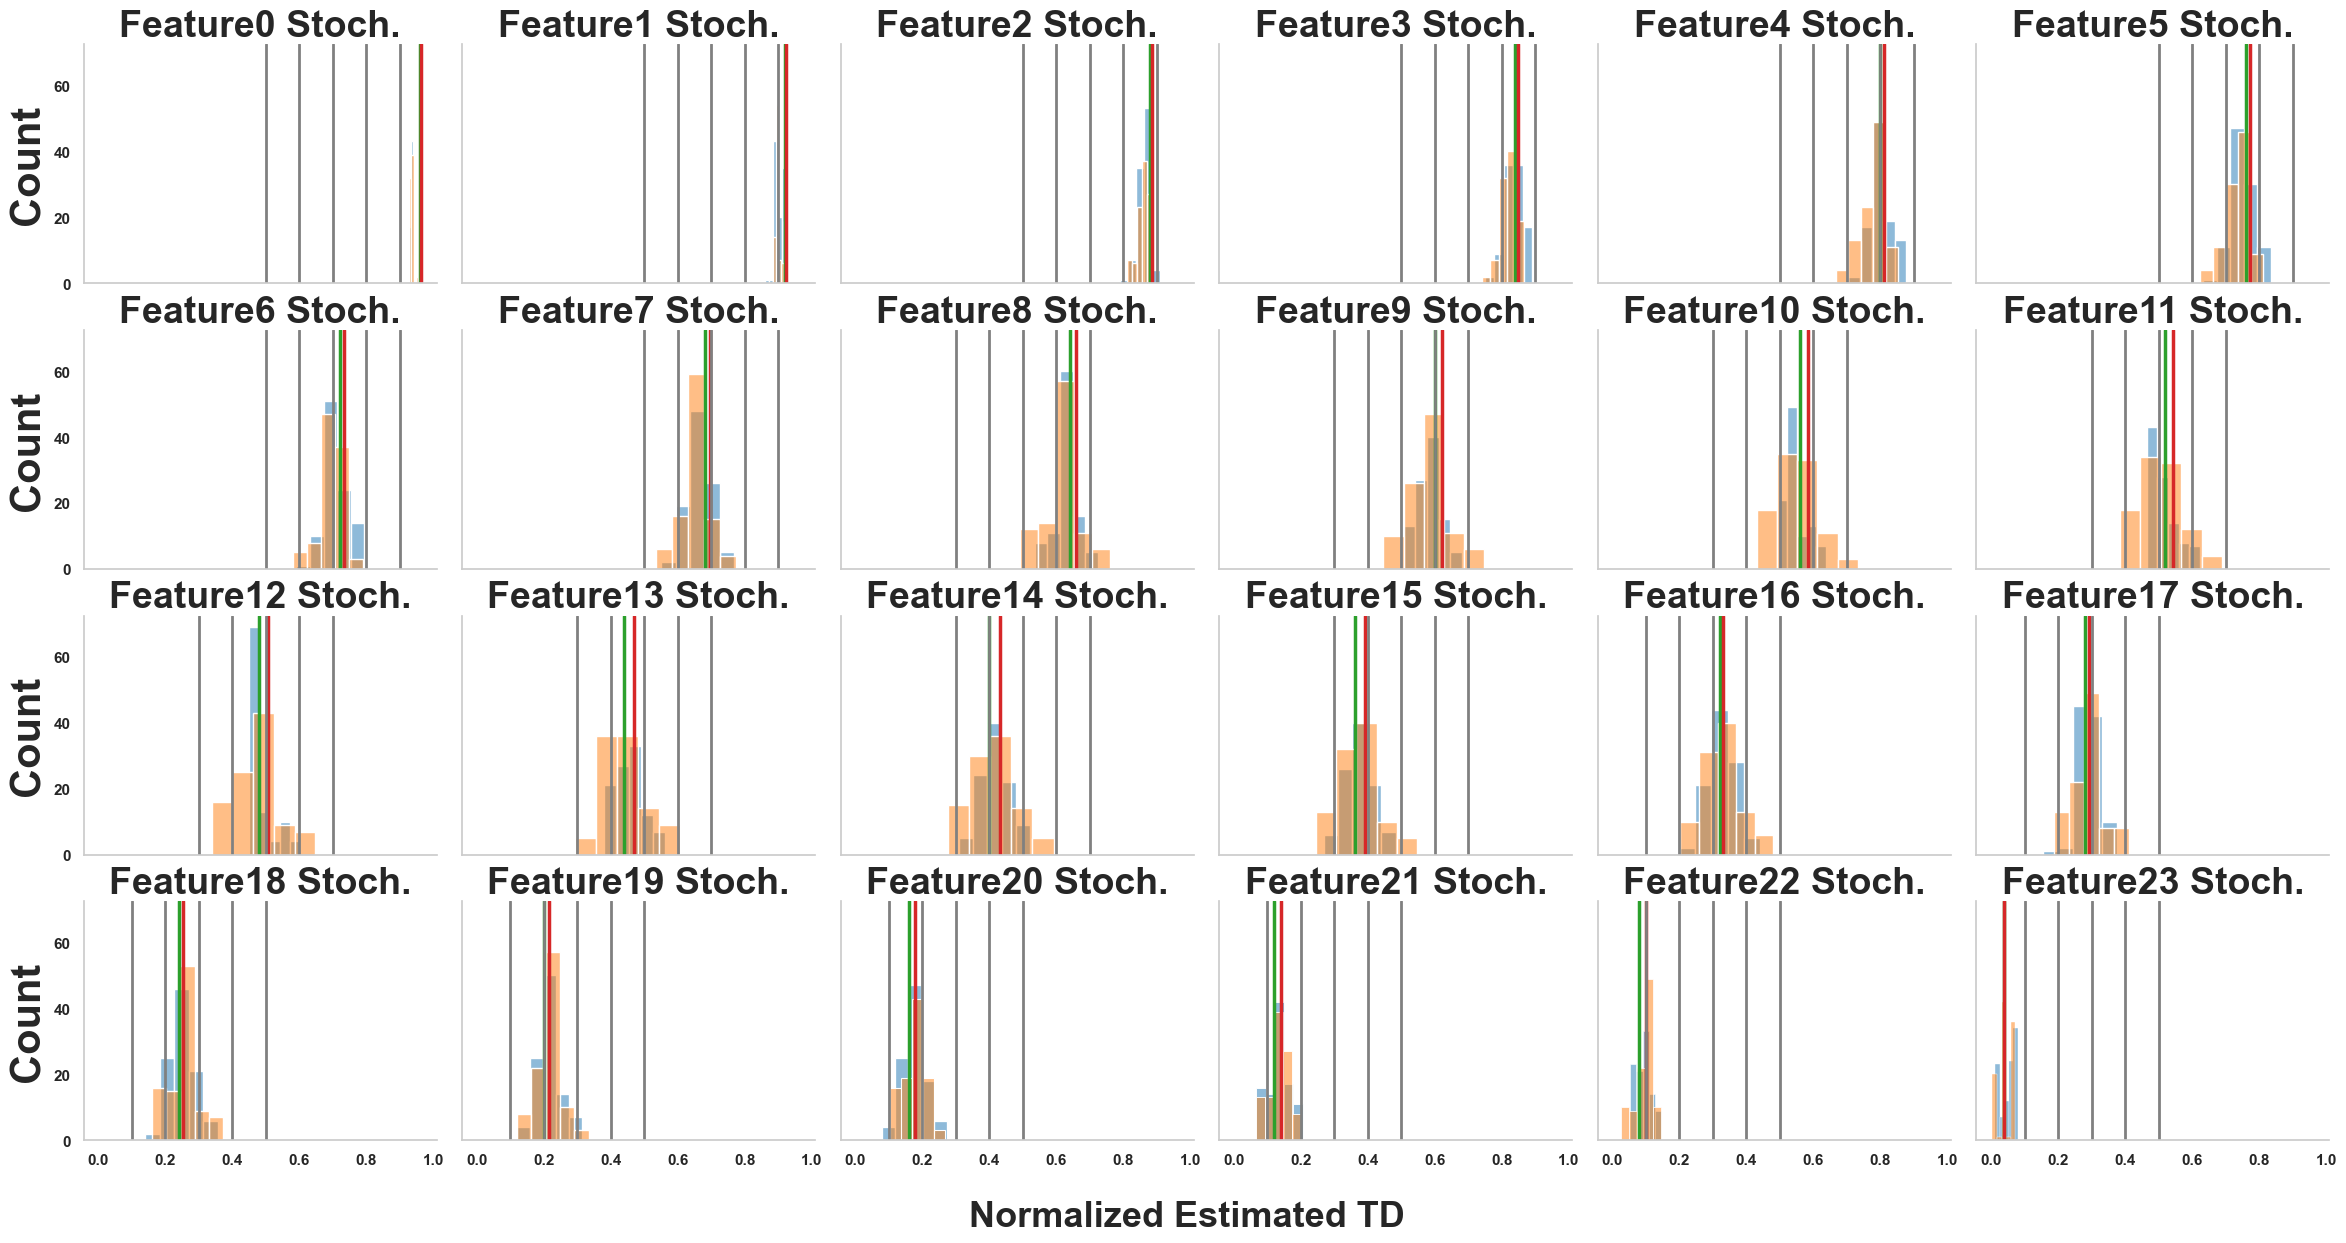

In [32]:
stochastic_dis_power_demand['features'] = stochastic_dis_power_demand['features'].replace('stochastic', 'Stoch.', regex=True)

with sns.axes_style("whitegrid", {'axes.grid': False}):
    g = sns.FacetGrid(stochastic_dis_power_demand, col="features", col_wrap=6, aspect=1.3, hue='Method', palette=custom_palette)
    g.map_dataframe(sns.histplot, "deltas", bins=5, alpha=0.5, palette=custom_palette)

    for i, ax in enumerate(g.axes.flat):
        l1 = ax.axvline(x=stochastic_power_reverse_mi_deltas[i], ymin=0, ymax=1, c=custom_palette['TDMI'], label='TDMI Time Delay', linewidth=2.5)
        l2 = ax.axvline(x=stochastic_power_reverse_cc_deltas[i], ymin=0, ymax=1, c=custom_palette['GCC'], label='GCC Time Delay', linewidth=2.5)
        l3 = ax.axvline(x=power_reverse_real_deltas0[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=2)
        l4 = ax.axvline(x=power_reverse_real_deltas1[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=2)
        l5 = ax.axvline(x=power_reverse_real_deltas2[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=2)
        l6 = ax.axvline(x=power_reverse_real_deltas3[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=2)
        l7 = ax.axvline(x=power_reverse_real_deltas4[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=2)

    g.set_titles(col_template="{col_name}", size=27, fontweight='bold')
    g.set_xlabels('Normalized Estimated TD', fontsize = 30)
    g.set_ylabels('Count', fontsize = 30)

    g.set_xlabels('')
    plt.text(-2.4, -26, 'Normalized Estimated TD', ha='center', fontsize=26)

In [33]:
g.savefig("distribution_power_stochastic.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


* occupancy distribution

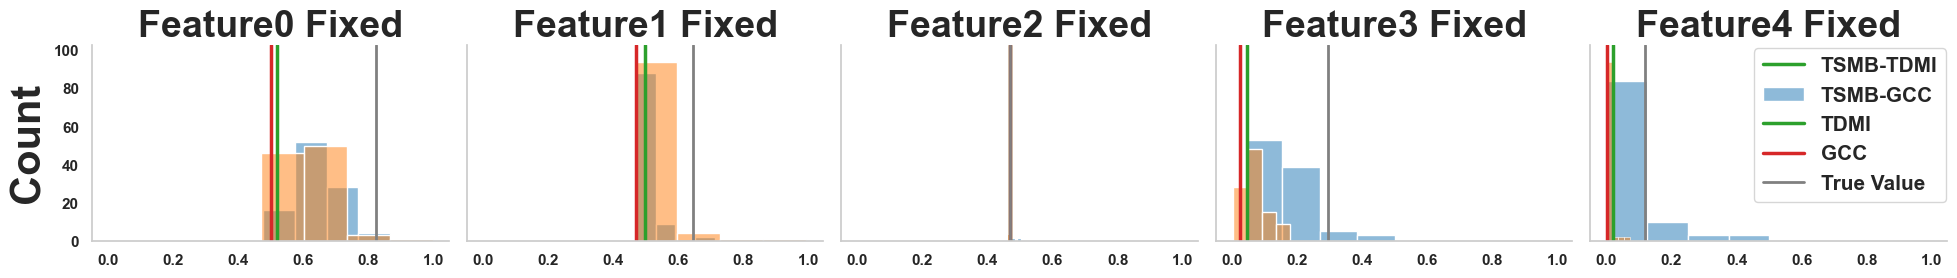

In [34]:
fixed_dis_occupancy['features'] = fixed_dis_occupancy['features'].replace('fixed', 'Fixed', regex=True)

with sns.axes_style("whitegrid", {'axes.grid': False}):
    g = sns.FacetGrid(fixed_dis_occupancy, col="features", hue='Method', aspect=1.3, palette=custom_palette)

    for i, ax in enumerate(g.axes.flat):
        l1 = ax.axvline(x=fixed_occupancy_reverse_mi_deltas[i], ymin=0, ymax=1, c=custom_palette['TDMI'], label='TDMI Time Delay', linewidth=2.5)
        l2 = ax.axvline(x=fixed_occupancy_reverse_cc_deltas[i], ymin=0, ymax=1, c=custom_palette['GCC'], label='GCC Time Delay', linewidth=2.5)
        l3 = ax.axvline(x=occupancy_reverse_real_deltas2[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=2)

    g.map_dataframe(sns.histplot, "deltas", bins=4, alpha=0.5)
    g.set_titles(col_template="{col_name}", size=27, fontweight='bold')
    g.set_xlabels('Normalized Estimated TD', fontsize = 30)
    g.set_ylabels('Count', fontsize = 30)

    g.set_xlabels('')
    plt.legend([g.axes[0][0].get_children()[0], g.axes[0][0].get_children()[5], l1, l2, l3], ['TSMB-TDMI', 'TSMB-GCC', 'TDMI', 'GCC', 'True Value'], 
               bbox_to_anchor=(0.43, 1.035),ncol=1, fontsize=15)

In [35]:
g.savefig("distribution_occupancy_fixed.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


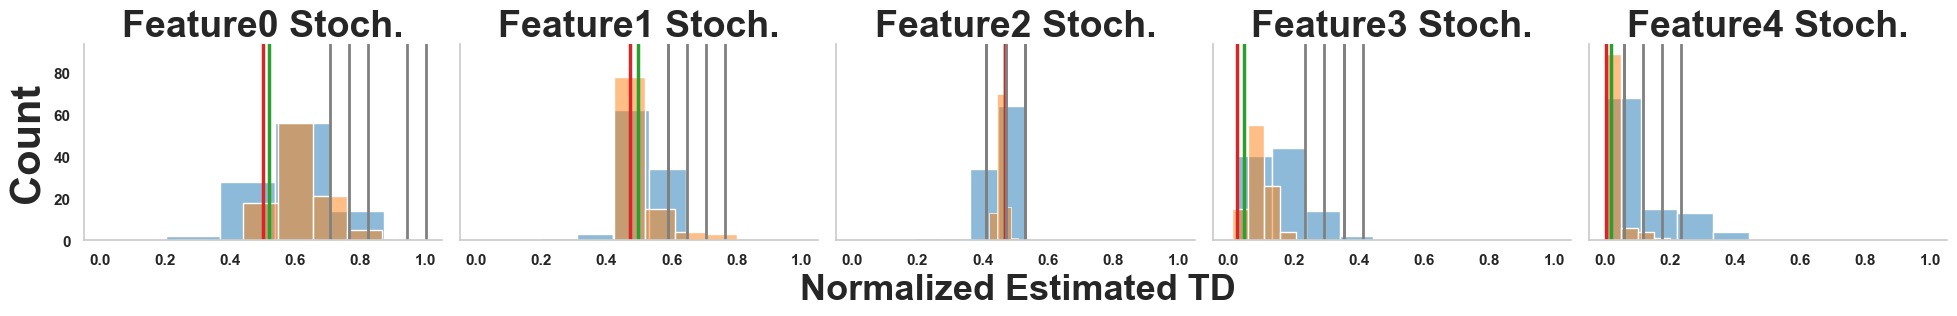

In [36]:
stochastic_dis_occupancy['features'] = stochastic_dis_occupancy['features'].replace('stochastic', 'Stoch.', regex=True)

with sns.axes_style("whitegrid", {'axes.grid': False}):
    g = sns.FacetGrid(stochastic_dis_occupancy, col="features", hue='Method', aspect=1.3, palette=custom_palette)

    for i, ax in enumerate(g.axes.flat):
        l1 = ax.axvline(x=stochastic_occupancy_reverse_mi_deltas[i], ymin=0, ymax=1, c=custom_palette['TDMI'], label='TDMI Time Delay', linewidth=2.5)
        l2 = ax.axvline(x=stochastic_occupancy_reverse_cc_deltas[i], ymin=0, ymax=1, c=custom_palette['GCC'], label='GCC Time Delay', linewidth=2.5)
        l3 = ax.axvline(x=occupancy_reverse_real_deltas0[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=2)
        l4 = ax.axvline(x=occupancy_reverse_real_deltas1[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=2)
        l5 = ax.axvline(x=occupancy_reverse_real_deltas2[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=2)
        l6 = ax.axvline(x=occupancy_reverse_real_deltas3[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=2)
        l7 = ax.axvline(x=occupancy_reverse_real_deltas4[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=2)

    g.map_dataframe(sns.histplot, "deltas", bins=4, alpha=0.5)
    g.set_titles(col_template="{col_name}", size=27, fontweight='bold')
    g.set_xlabels('Normalized Estimated TD', fontsize = 30)
    g.set_ylabels('Count', fontsize = 30)

    g.set_xlabels('')
    plt.text(-1.8, -28, 'Normalized Estimated TD', ha='center', fontsize=26)

In [37]:
g.savefig("distribution_occupancy_stochastic.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


* air_quality distribution

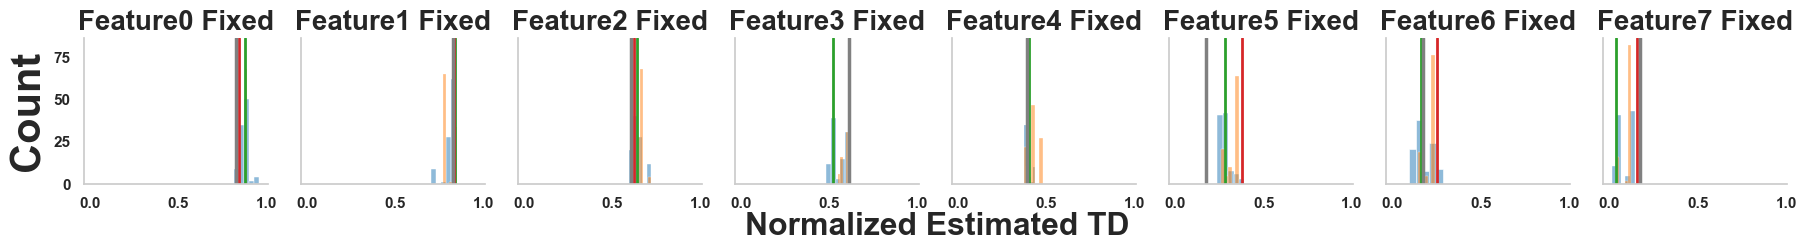

In [38]:
fixed_dis_air_quality['features'] = fixed_dis_air_quality['features'].replace('fixed', 'Fixed', regex=True)

with sns.axes_style("whitegrid", {'axes.grid': False}):
    g = sns.FacetGrid(fixed_dis_air_quality, col="features", height=2.5, col_wrap=8, aspect=0.9, hue='Method', palette=custom_palette)

    for i, ax in enumerate(g.axes.flat):
        l1 = ax.axvline(x=fixed_air_reverse_mi_deltas[i], ymin=0, ymax=1, c=custom_palette['TDMI'], label='TDMI Time Delay', linewidth=2)
        l2 = ax.axvline(x=fixed_air_reverse_cc_deltas[i], ymin=0, ymax=1, c=custom_palette['GCC'], label='GCC Time Delay', linewidth=2)
        l3 = ax.axvline(x=air_reverse_real_deltas2[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=2.5)

    g.map_dataframe(sns.histplot, "deltas", bins=5, alpha=0.5)
    g.set_titles(col_template="{col_name}", size=20, fontweight='bold')
    g.set_xlabels('Normalized Estimated TD', fontsize = 30)
    g.set_ylabels('Count', fontsize = 30)

    g.set_xlabels('')
    plt.text(-3.8, -30, 'Normalized Estimated TD', ha='center', fontsize=23)

In [39]:
g.savefig("distribution_air_fixed.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


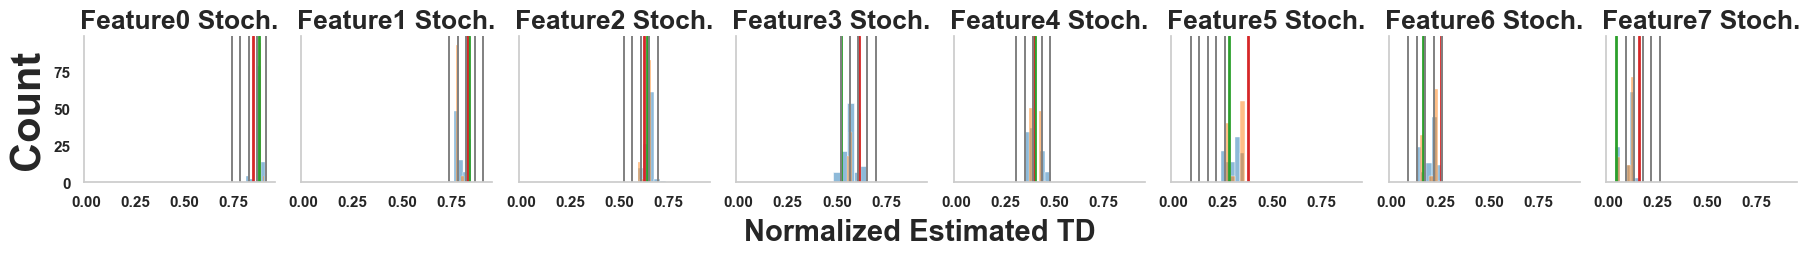

In [40]:
stochastic_dis_air['features'] = stochastic_dis_air['features'].replace('stochastic', 'Stoch.', regex=True)

with sns.axes_style("whitegrid", {'axes.grid': False}):
    g = sns.FacetGrid(stochastic_dis_air, col="features", height=2.5, col_wrap=8, aspect=0.9, hue='Method', palette=custom_palette)

    for i, ax in enumerate(g.axes.flat):
        l1 = ax.axvline(x=stochastic_air_reverse_mi_deltas[i], ymin=0, ymax=1, c=custom_palette['TDMI'], label='TDMI Time Delay', linewidth=2)
        l2 = ax.axvline(x=stochastic_air_reverse_cc_deltas[i], ymin=0, ymax=1, c=custom_palette['GCC'], label='GCC Time Delay', linewidth=2)
        l3 = ax.axvline(x=air_reverse_real_deltas0[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=1.4)
        l4 = ax.axvline(x=air_reverse_real_deltas1[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=1.4)
        l5 = ax.axvline(x=air_reverse_real_deltas2[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=1.4)
        l6 = ax.axvline(x=air_reverse_real_deltas3[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=1.4)
        l7 = ax.axvline(x=air_reverse_real_deltas4[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=1.4)

    g.map_dataframe(sns.histplot, "deltas", bins=5, alpha=0.5)
    g.set_titles(col_template="{col_name}", size=19, fontweight='bold')
    g.set_xlabels('Normalized Estimated TD', fontsize = 30)
    g.set_ylabels('Count', fontsize = 30)

    g.set_xlabels('')
    plt.text(-3.5, -39, 'Normalized Estimated TD', ha='center', fontsize=21)

In [41]:
g.savefig("distribution_air_stochastic.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


* pump_sensor

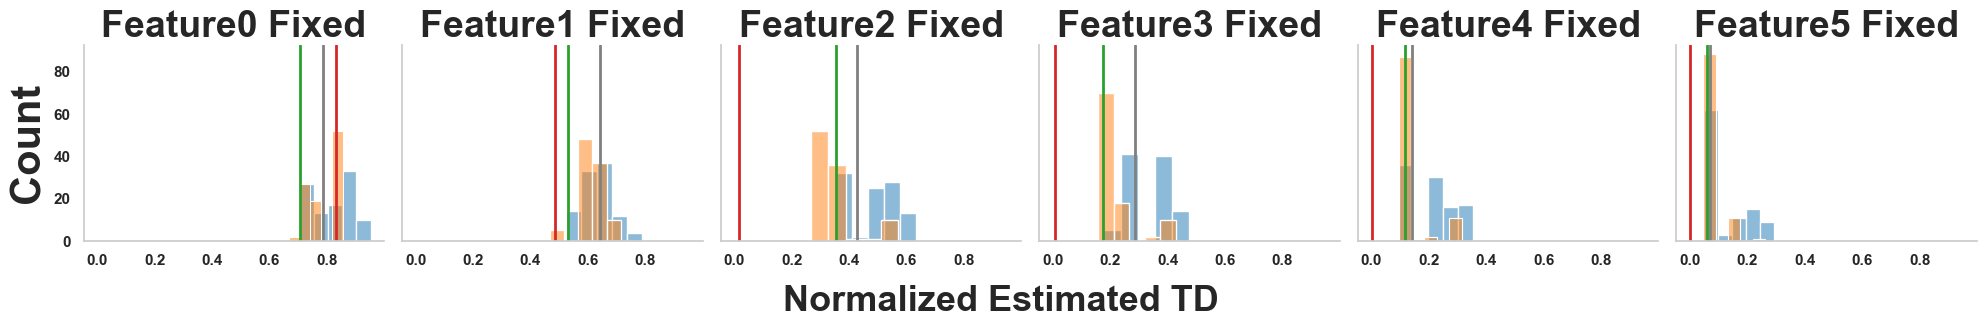

In [42]:
fixed_dis_sensor['features'] = fixed_dis_sensor['features'].replace('fixed', 'Fixed', regex=True)

with sns.axes_style("whitegrid", {'axes.grid': False}):
    g = sns.FacetGrid(fixed_dis_sensor, col="features", hue='Method', aspect=1.1, palette=custom_palette)

    for i, ax in enumerate(g.axes.flat):
        l1 = ax.axvline(x=fixed_sensor_reverse_mi_deltas[i], ymin=0, ymax=1, c=custom_palette['TDMI'], label='TDMI Time Delay', linewidth=2)
        l2 = ax.axvline(x=fixed_sensor_reverse_cc_deltas[i], ymin=0, ymax=1, c=custom_palette['GCC'], label='GCC Time Delay', linewidth=2)
        l3 = ax.axvline(x=sensor_reverse_real_deltas2[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=2)

    g.map_dataframe(sns.histplot, "deltas", bins=5, alpha=0.5)
    g.set_titles(col_template="{col_name}", size=27, fontweight='bold')
    g.set_xlabels('Normalized Estimated TD', fontsize = 30)
    g.set_ylabels('Count', fontsize = 30)

    g.set_xlabels('')
    plt.text(-2.4, -33, 'Normalized Estimated TD', ha='center', fontsize=26)

In [43]:
g.savefig("distribution_sensor_fixed.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


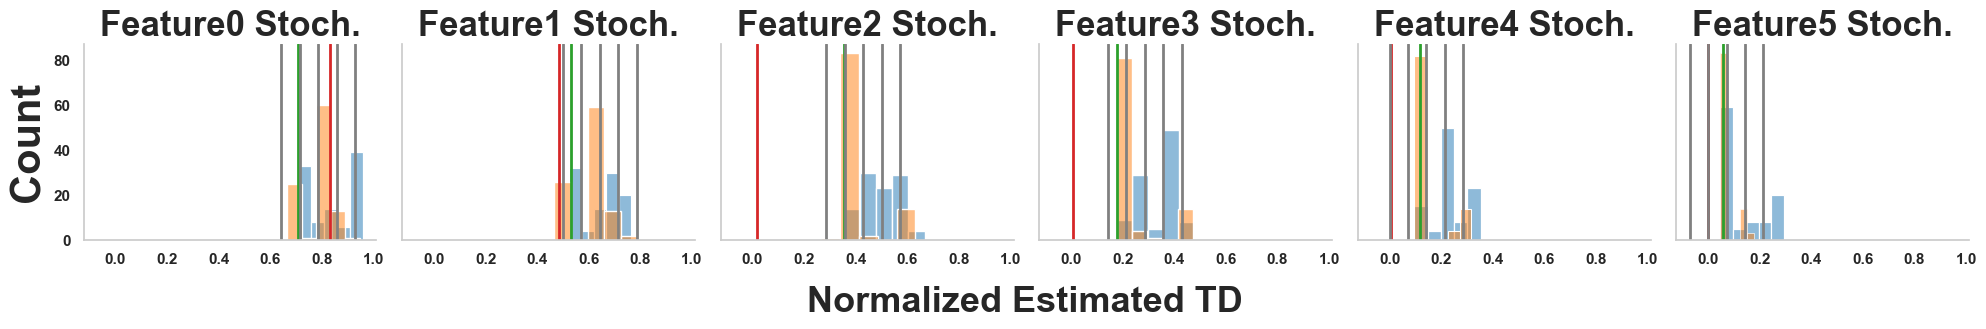

In [44]:
stochastic_dis_sensor['features'] = stochastic_dis_sensor['features'].replace('stochastic', 'Stoch.', regex=True)

with sns.axes_style("whitegrid", {'axes.grid': False}):
    g = sns.FacetGrid(stochastic_dis_sensor, col="features", hue='Method', aspect=1.1, palette=custom_palette)

    for i, ax in enumerate(g.axes.flat):
        l1 = ax.axvline(x=stochastic_sensor_reverse_mi_deltas[i], ymin=0, ymax=1, c=custom_palette['TDMI'], label='TDMI Time Delay', linewidth=2)
        l2 = ax.axvline(x=stochastic_sensor_reverse_cc_deltas[i], ymin=0, ymax=1, c=custom_palette['GCC'], label='GCC Time Delay', linewidth=2)
        l3 = ax.axvline(x=sensor_reverse_real_deltas0[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=2)
        l4 = ax.axvline(x=sensor_reverse_real_deltas1[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=2)
        l5 = ax.axvline(x=sensor_reverse_real_deltas2[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=2)
        l6 = ax.axvline(x=sensor_reverse_real_deltas3[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=2)
        l7 = ax.axvline(x=sensor_reverse_real_deltas4[i], ymin=0, ymax=1, c=custom_palette['Real Time Delay'], label='Real Time Delay', linewidth=2)

    g.map_dataframe(sns.histplot, "deltas", bins=5, alpha=0.5)
    g.set_titles(col_template="{col_name}", size=25, fontweight='bold')
    g.set_xlabels('Normalized Estimated TD', fontsize = 30)
    g.set_ylabels('Count', fontsize = 30)

    g.set_xlabels('')
    plt.text(-2.65, -32, 'Normalized Estimated TD', ha='center', fontsize=26)

In [45]:
g.savefig("distribution_sensor_stochastic.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


* mineral

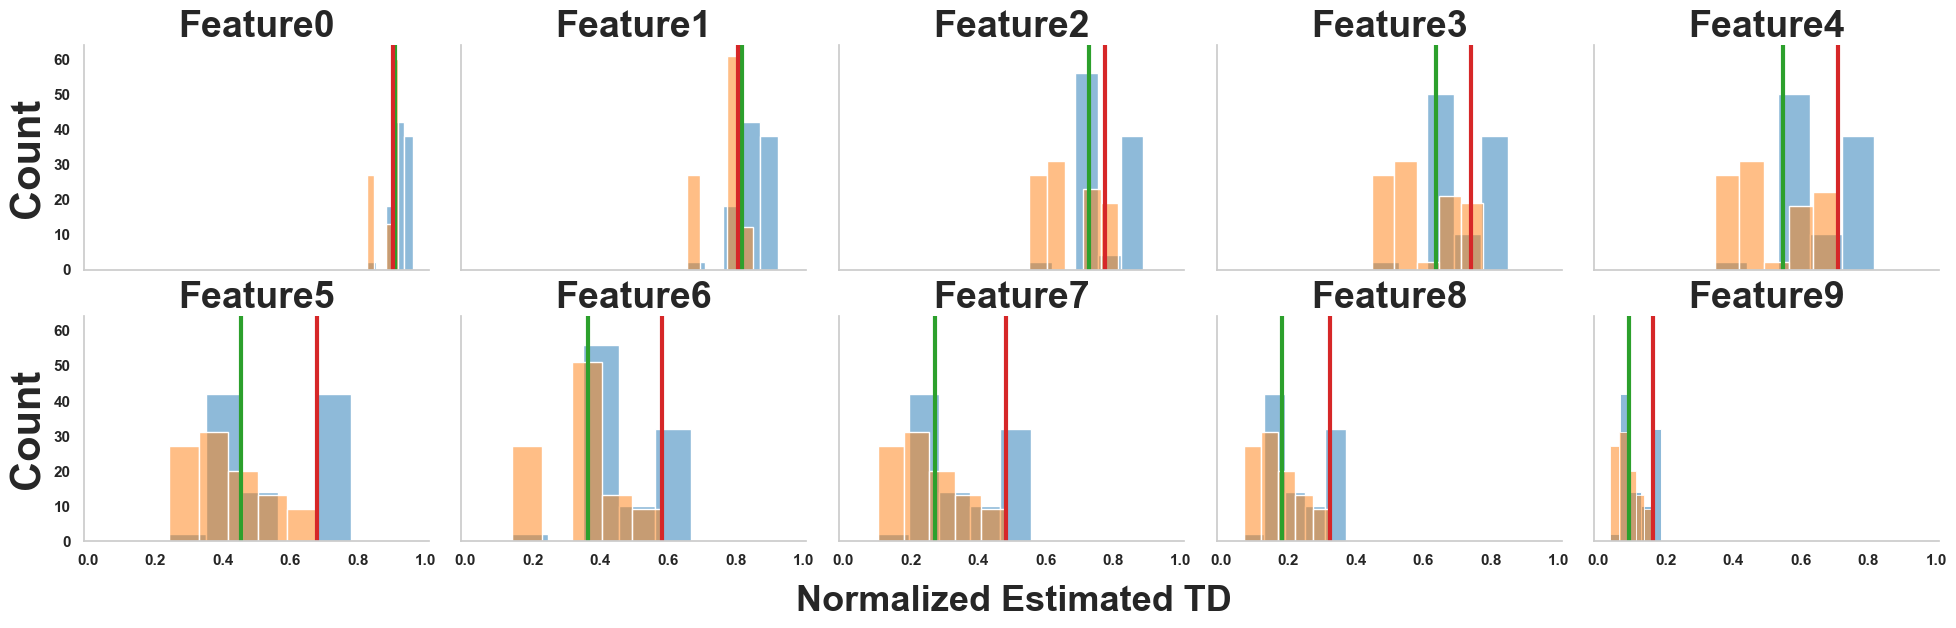

In [46]:
with sns.axes_style("whitegrid", {'axes.grid': False}):
    g = sns.FacetGrid(fixed_dis_mineral, col="features", col_wrap=5, aspect=1.3, hue='Method', palette=custom_palette)
    g.map_dataframe(sns.histplot, "deltas", bins=5, alpha=0.5, palette=custom_palette)

    for i, ax in enumerate(g.axes.flat):
        l1 = ax.axvline(x=mineral_reverse_mi_deltas[i], ymin=0, ymax=1, c=custom_palette['TDMI'], label='TDMI Time Delay', linewidth=3)
        l2 = ax.axvline(x=mineral_reverse_cc_deltas[i], ymin=0, ymax=1, c=custom_palette['GCC'], label='GCC Time Delay', linewidth=3)

    g.set_titles(col_template="{col_name}", size=27, fontweight='bold')
    g.set_xlabels('Normalized Estimated TD', fontsize = 30)
    g.set_ylabels('Count', fontsize = 30)

    g.set_xlabels('')
    plt.text(-1.73, -20, 'Normalized Estimated TD', ha='center', fontsize=26)

In [47]:
g.savefig("distribution_mineral_processing.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


## tft_performance

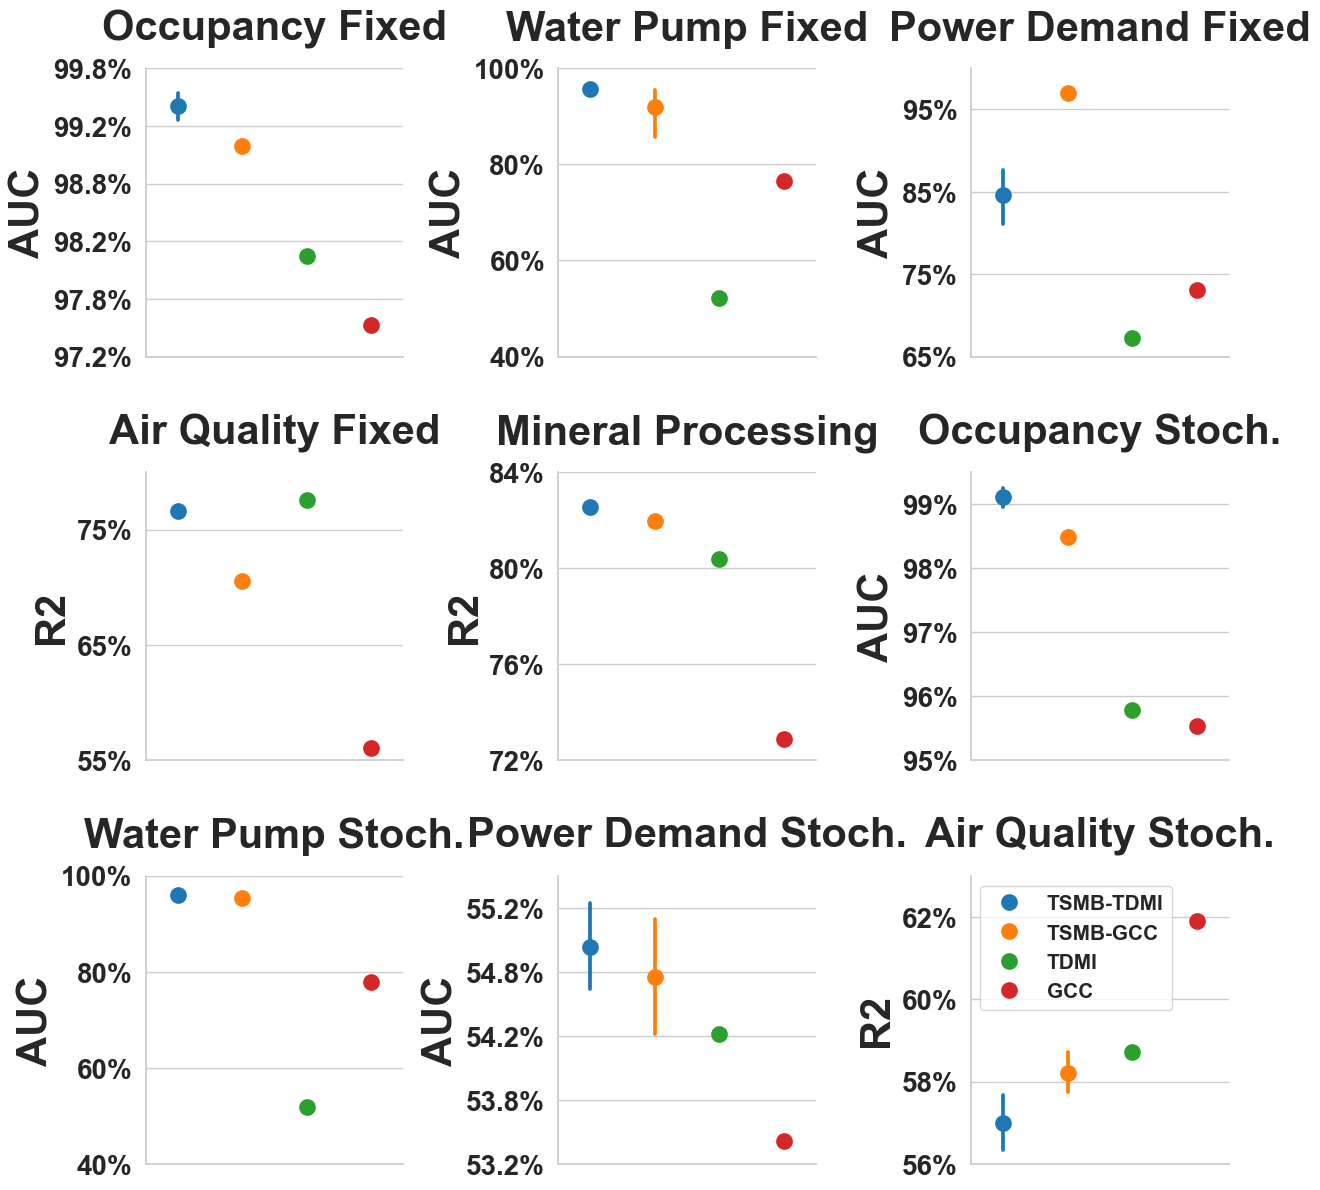

In [48]:
tft_performance['Dataset'] = tft_performance['Dataset'].replace('Stochastic', 'Stoch.', regex=True)

g = sns.FacetGrid(tft_performance, col="Dataset", height=4, sharey=False, col_wrap=3, margin_titles=False, col_order=col_order)
g.map_dataframe(sns.pointplot, x='Method',  y="test_values", hue='Method', linestyles='', palette=custom_palette, markersize=10)
g.set_xticklabels([], rotation=30, horizontalalignment='right', fontsize=20)
g.set_yticklabels(fontsize=20)
plt.subplots_adjust(wspace=0.6, hspace=0.4)
for ax in g.axes.flat:
    for point in ax.collections:
        point.set_sizes([80]) 

for i, ax in enumerate(g.axes.flat):
    if i in [0, 7]:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.1f}%'))
    else:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.0f}%'))
        
for i, ax in enumerate(g.axes.flat):
    if i in [0, 1, 2, 5, 6, 7]:
        ax.set_ylabel("AUC", fontsize = 30)
        ax.set_yticks(ax.get_yticks()[::2])
    else:
        ax.set_ylabel("R2", fontsize = 30)
        ax.set_yticks(ax.get_yticks()[::2])

g.set_titles(y=1.07, col_template="{col_name}", size=30, fontweight='bold')
g.set_xlabels('')
plt.legend([g.axes[0].get_children()[0], g.axes[0].get_children()[5], g.axes[0].get_children()[10], g.axes[0].get_children()[15]], 
           ['TSMB-TDMI', 'TSMB-GCC', 'TDMI', 'GCC'], bbox_to_anchor=(0.82, 1),ncol=1, fontsize=15)

In [49]:
g.savefig("tft_performance.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


### tft_select_b

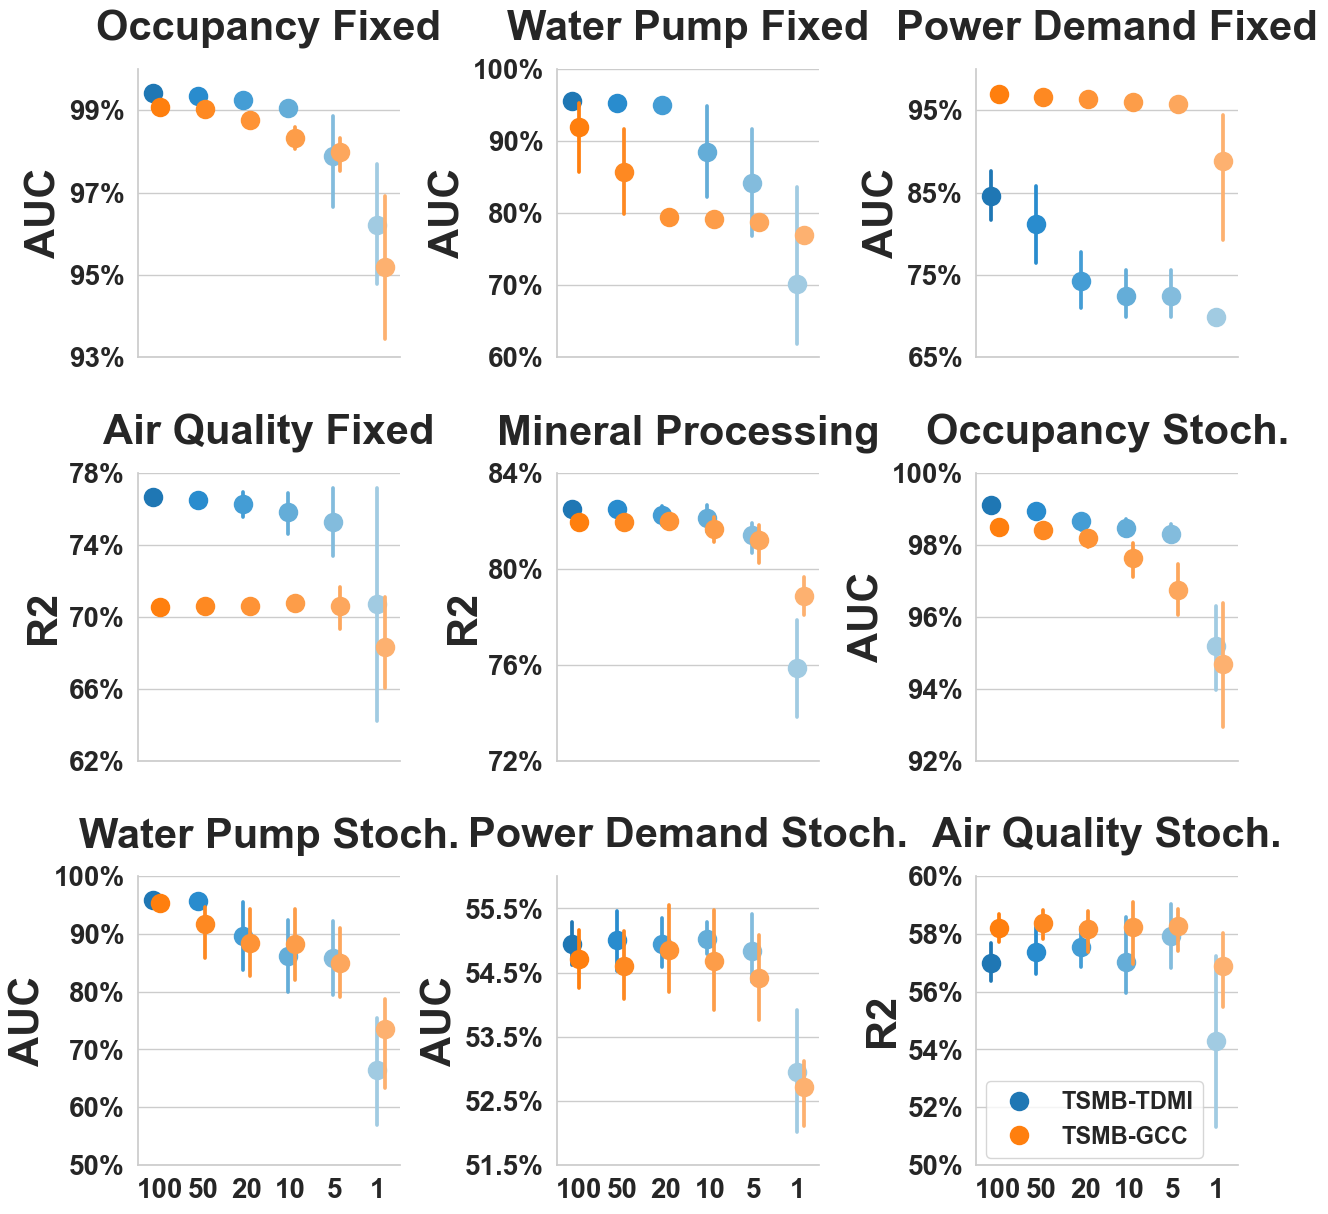

In [50]:
tft_select_b['Dataset'] = tft_select_b['Dataset'].replace('Stochastic', 'Stoch.', regex=True)

new_xticks = [100, 50, 20, 10, 5, 1]
tft_select_b['method'] = pd.Categorical(tft_select_b['method'], categories=new_xticks, ordered=True)

g = sns.FacetGrid(tft_select_b, col="Dataset", height=4, sharey=False, col_wrap=3, col_order=col_order)
g.map_dataframe(sns.pointplot, x='method',  y="test_values", hue='Method name', linestyles='', palette=custom_palette, dodge=True, markersize=12)
g.set_titles(col_template="{col_name}", size=30, fontweight='bold', y=1.07)
g.set_xticklabels(fontsize=20)
g.set_yticklabels(fontsize=20)
plt.subplots_adjust(wspace=0.6, hspace=0.4)

for ax in g.axes.flat:
    for point in ax.collections:
        point.set_sizes([80])
        
tick_labels = ['100', '50', '20', '10', '5', '1']
num_ticks = len(tick_labels)
for ax in g.axes.flat:
    ax.set_xticks(range(num_ticks))
    ax.set_xticklabels(tick_labels)

for i, ax in enumerate(g.axes.flat):
    ax.set_yticks(ax.get_yticks()[::2])
    if i in [7]:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.1f}%'))
    else:
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{(y*100):.0f}%'))
        
for i, ax in enumerate(g.axes.flat):
    if i in [0, 1, 2, 5, 6, 7]:
        ax.set_ylabel("AUC", fontsize = 30)
    else:
        ax.set_ylabel("R2", fontsize = 30)

g.set_xlabels('')
plt.legend([g.axes[0].get_children()[0], g.axes[0].get_children()[42]], ['TSMB-TDMI', 'TSMB-GCC'], 
           bbox_to_anchor=(0.91, 0.33),ncol=1, fontsize=17)

In [51]:
g.savefig("tft_select_b.pdf", dpi = 300, bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


## table

In [52]:
add_tft_df = pd.DataFrame({
    'Method': ['Real time delay']*8 + ['No Aligment']*9,
    'test_values': [fixed_tft_o_real, stochastic_tft_o_real, fixed_tft_s_real, stochastic_tft_s_real, 
                    fixed_tft_p_real, stochastic_tft_p_real, fixed_tft_a_real, stochastic_tft_a_real,
                    fixed_tft_o_no_aligment, stochastic_tft_o_no_aligment, fixed_tft_s_no_aligment, stochastic_tft_s_no_aligment, 
                    fixed_tft_p_no_aligment, stochastic_tft_p_no_aligment, fixed_tft_a_no_aligment, stochastic_tft_a_no_aligment, 
                    fixed_tft_m_no_aligment],
    'Dataset': ['Occupancy Fixed', 'Occupancy Stoch.', 'Water Pump Fixed', 'Water Pump Stoch.', 
                'Power Demand Fixed', 'Power Demand Stoch.', 'Air Quality Fixed', 'Air Quality Stoch.']*2 + 
               ['Mineral Processing']
})
add_performance_df = pd.DataFrame({
    'Method': ['Real time delay']*8 + ['No Aligment']*9,
    'test_values': [fixed_o_real, stochastic_o_real, fixed_s_real, stochastic_s_real, fixed_p_real, stochastic_p_real, fixed_a_real, stochastic_a_real,
                    fixed_o_no_aligment, stochastic_o_no_aligment, fixed_s_no_aligment, stochastic_s_no_aligment, fixed_p_no_aligment, 
                    stochastic_p_no_aligment, fixed_a_no_aligment, stochastic_a_no_aligment, fixed_m_no_aligment],
    'Dataset': ['Occupancy Fixed', 'Occupancy Stoch.', 'Water Pump Fixed', 'Water Pump Stoch.', 
                'Power Demand Fixed', 'Power Demand Stoch.', 'Air Quality Fixed', 'Air Quality Stoch.']*2 + 
               ['Mineral Processing']
})

In [53]:
all_performance_table = pd.concat([all_performance, add_performance_df])
tft_performance_table = pd.concat([tft_performance, add_tft_df])

In [54]:
def mean_and_ci(x):
    mean = np.mean(x)
    sd = np.std(x)
    n = len(x)
    ci = 1.96 * sd / np.sqrt(n)
    
    if len(set(x)) > 1:
        return f'{mean:.3f} (± {ci:.3f})'
    return f'{mean:.3f}'

In [55]:
def df_to_latex(df):
    original_order = df['Dataset'].unique()
    df = pd.DataFrame(df.groupby(['Dataset', 'Method'])['test_values'].agg(mean_and_ci)).unstack().T
    df = df[original_order]
    df.reset_index('Method', inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.index.name = None
    df.columns.name = None
    new_multi_columns = pd.MultiIndex.from_tuples([
    ('Method', ''), 
    ('Occupancy', 'Fixed'), ('Occupancy', 'Stoch.'),
    ('Water Pump', 'Fixed'), ('Water Pump', 'Stoch.'),
    ('Power Demand ', 'Fixed'), ('Power Demand ', 'Stoch.'),
    ('Air Quality ', 'Fixed'), ('Air Quality ', 'Stoch.'),
    ('Mineral Processing', '')
    ])
    df.columns = new_multi_columns
    
    method_order = ["TSMB-TDMI", "TSMB-GCC", "TDB-TDMI", "TDB-GCC", "Perturbed Model-TDMI", 
             "Perturbed Model-GCC", "TDMI", "GCC", "Real time delay", "No Aligment"]
    df['Method'] = pd.Categorical(df['Method'], categories=method_order, ordered=True)
    df = df.sort_values('Method')
    
    latex_table = df.to_latex(float_format="%.3f", na_rep="-", multicolumn_format="c", index=False)
    
    return latex_table

In [56]:
all_performance_latex = df_to_latex(all_performance_table)
tft_performance_latex = df_to_latex(tft_performance_table)
performance_table = all_performance_table[all_performance_table['Method'].isin([
    "TSMB-TDMI", "TSMB-GCC", "TDMI", "GCC", "Real time delay", "No Aligment"])]
performance_latex = performance_table.to_latex(float_format="%.3f", na_rep="-", multicolumn_format="c", index=False)